# Trace the Title Screen Raster Interrupts

These are the Vice monitor commands for doing this:
```
log on                                        
logname "IridisAlphaTitleScreenInterrupts.txt"
tr exec 090f 090f                             
tr exec 0916 0916                             
tr exec 0923 0923                             
tr exec 0947 0947                             
```

In [85]:
routines = {
"0916": "Paint Gilbies",
"0919": "Finish Paint Gilbies",
"0923": "Mutate Starfield",
"0935": "Finish Mutate Starfield - Acknowledge Interrupt",
"0938": "Title Text and Music",
"0944": "Finish Title Text and Music",
"0947": "Starfield",
"098d": "Finish Starfield - Acknowledge Starfield",
}

routine_names = {
"0916": "UpdateJumpingGilbyPositionsAndColors",
"0919": "Finish Paint Gilbies",
"0923": "TitleScreenMutateStarfieldAnimationData",
"0935": "Finish Mutate Starfield - Acknowledge Interrupt",
"0938": "UpdateTitleTextSprites and Music",
"0944": "Finish Title Text and Music",
"0947": "DoStarfieldAnimation",
"098d": "Finish Starfield - Acknowledge Starfield",
}

Extract the notes played from the Vice X64 log file. We store them as a list with each element like `("Voice1", "C-3")`, i.e. (voice, note). We get the notes by mapping from the hi/lo bytes logged by x64 to the notes they indicated using `sid_to_note`, which we created above.

In [37]:
log_file = "IridisAlphaTitleScreenInterrupts.txt"
input_file = open(log_file,'r')
curr, curr_count, raster = "", 0, []
for l in input_file.readlines():
    address = l[16:20]

    if not address in routines:
        continue
    routine = routines[address]
    if "Finish" in routine:
        continue
    if address == curr:
        curr_count +=1
        raster += [l[23:26].strip()]
        continue
        
    if curr in routines:
        print(routines[curr], curr_count, raster)
        
    curr, curr_count, raster = address, 1, [l[23:26].strip()]


Starfield 12 ['017', '078', '084', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
St

Starfield 14 ['152', '174', '181', '186', '192', '198', '204', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['270']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['267']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '181', '186', '192', '198', '205', '210', '216', '222', '228', '234', '240', '246']
Mutate Starf

Mutate Starfield 1 ['256']
Title Text and Music 1 ['267']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['152', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['268']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '114', '120', '126', '132', '138']
Paint Gilbies 1 ['143']
Starfield 14 ['153', '174', '180', '186', '192', '198', '205', '210', '216', '222', '229', '234', '240', '246']
Mutate Starfield 1 ['256']
Title Text and Music 1 ['269']
Starfield 12 ['017', '078', '085', '090', '096', '102', '108', '11

# Generate screen diagrams of rastering title screen

```
log on                                        
logname "IridisAlphaTitleScreenInterrupts.txt"
tr exec 0916 0916                             
tr exec 0919 0919                             
tr exec 0923 0923                             
tr exec 0935 0935                             
tr exec 0938 0938                             
tr exec 0944 0944                             
tr exec 0947 0947                             
tr exec 098d 098d                             
command 1 "screenshot \"title\" 2"            
command 2 "screenshot \"title\" 2"            
command 3 "screenshot \"title\" 2"            
command 4 "screenshot \"title\" 2"            
command 5 "screenshot \"title\" 2"            
command 6 "screenshot \"title\" 2"            
command 7 "screenshot \"title\" 2"            
command 8 "screenshot \"title\" 2"            
```

Patch for vice:
```c
Index: src/monitor/monitor.c
===================================================================
--- src/monitor/monitor.c       (revision 42926)
+++ src/monitor/monitor.c       (working copy)
@@ -1105,6 +1105,7 @@
 void mon_screenshot_save(const char* filename, int format)
 {
     const char* drvname;
+    static int counter = 0;
 
     switch (format) {
         case 1:
@@ -1123,7 +1124,12 @@
             drvname = "BMP";
             break;
     }
-    if (screenshot_save(drvname, filename, machine_video_canvas_get(0))) {
+    char counter_string[16];
+    sprintf(counter_string, "%d", counter++);
+
+    const char* uniq_name;
+    uniq_name = util_concat(filename, counter_string, ".png", NULL);
+    if (screenshot_save(drvname, uniq_name, machine_video_canvas_get(0))) {
         mon_out("Failed.\n");
     }
 }

```

In [86]:
log_file = "IridisAlphaTitleScreenInterrupts.txt"
input_file = open(log_file,'r')
curr, curr_count, curr_raster, curr_cycles = "", 0, [], []
prev_program_counter = 0

routine_history = []
lines = input_file.readlines()
c = 0
for i in range(16, len(lines), 6):
    address = lines[i][16:20]
    raster = lines[i][23:26].strip()
    prev_program_counter = int(lines[i+1][70:78])
    program_counter = int(lines[i+4][70:78])
    cycles = program_counter - prev_program_counter
    
    routine = routine_names[address]
    routine_history += [(routine, raster, cycles, f"titlescreen/title{c+1}.png")]
    c += 2

In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def createGraph(img, ylabel, raster, label_size):
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img, extent=(0,504,312,0))
    ax.set_ylabel("Rasterline Position", fontsize = 40)  

    ax.set_yticks([0,int(raster),312])
    ax.set_xticks([0,504])
    plt.yticks(fontsize=label_size)
    plt.xticks(fontsize=label_size)
    
    ax.set_xlabel(f"\n{ylabel}", fontsize = 45)  
    #ax.set_xlabel(r'\begin{center}X-axis\\*\textit{\small{' + label + r'}}\end{center}')
    return plt


In [106]:
routine_history[:10]

[('DoStarfieldAnimation', '17', 127, 'titlescreen/title1.png'),
 ('DoStarfieldAnimation', '78', 99, 'titlescreen/title3.png'),
 ('DoStarfieldAnimation', '84', 99, 'titlescreen/title5.png'),
 ('DoStarfieldAnimation', '90', 151, 'titlescreen/title7.png'),
 ('DoStarfieldAnimation', '96', 98, 'titlescreen/title9.png'),
 ('DoStarfieldAnimation', '102', 99, 'titlescreen/title11.png'),
 ('DoStarfieldAnimation', '108', 99, 'titlescreen/title13.png'),
 ('DoStarfieldAnimation', '114', 151, 'titlescreen/title15.png'),
 ('DoStarfieldAnimation', '120', 98, 'titlescreen/title17.png'),
 ('DoStarfieldAnimation', '126', 98, 'titlescreen/title19.png')]

<ipython-input-103-d79a2a26931f>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,20))


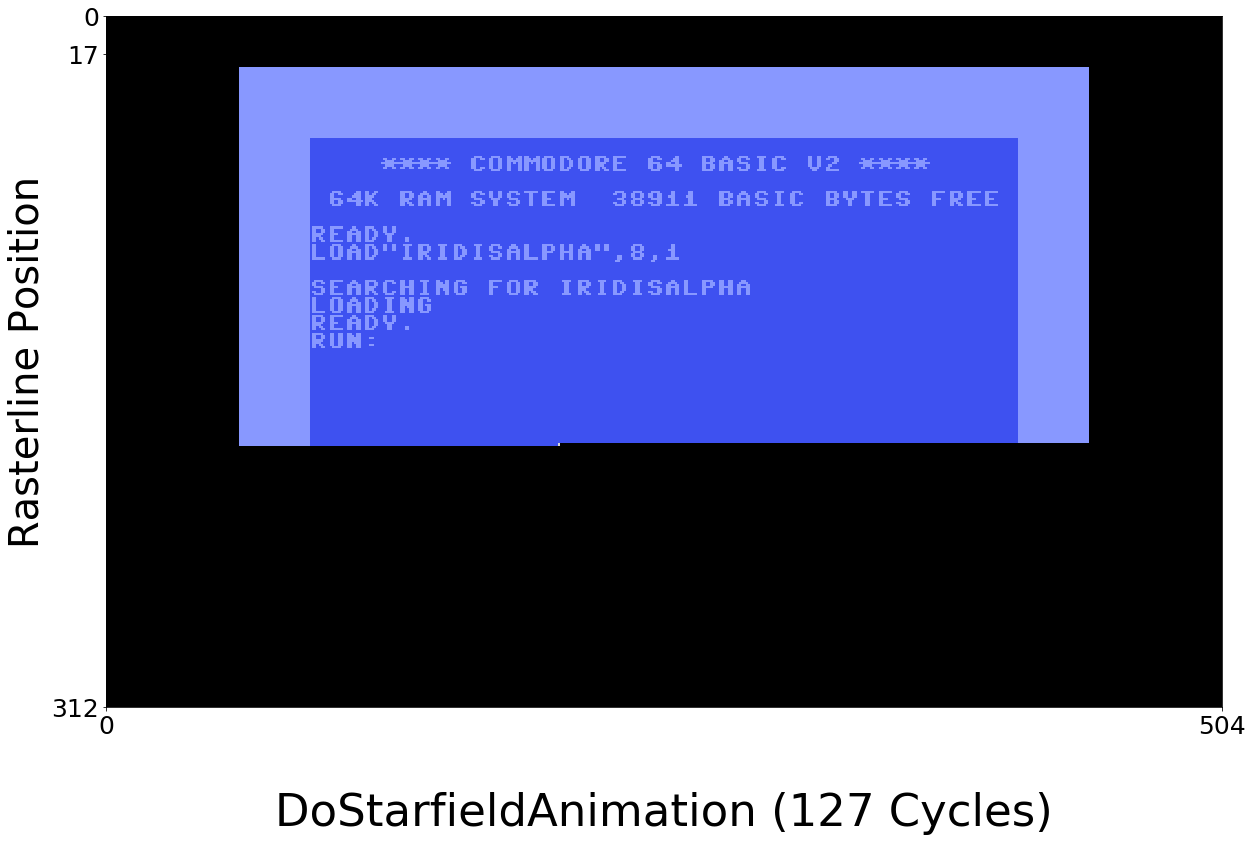

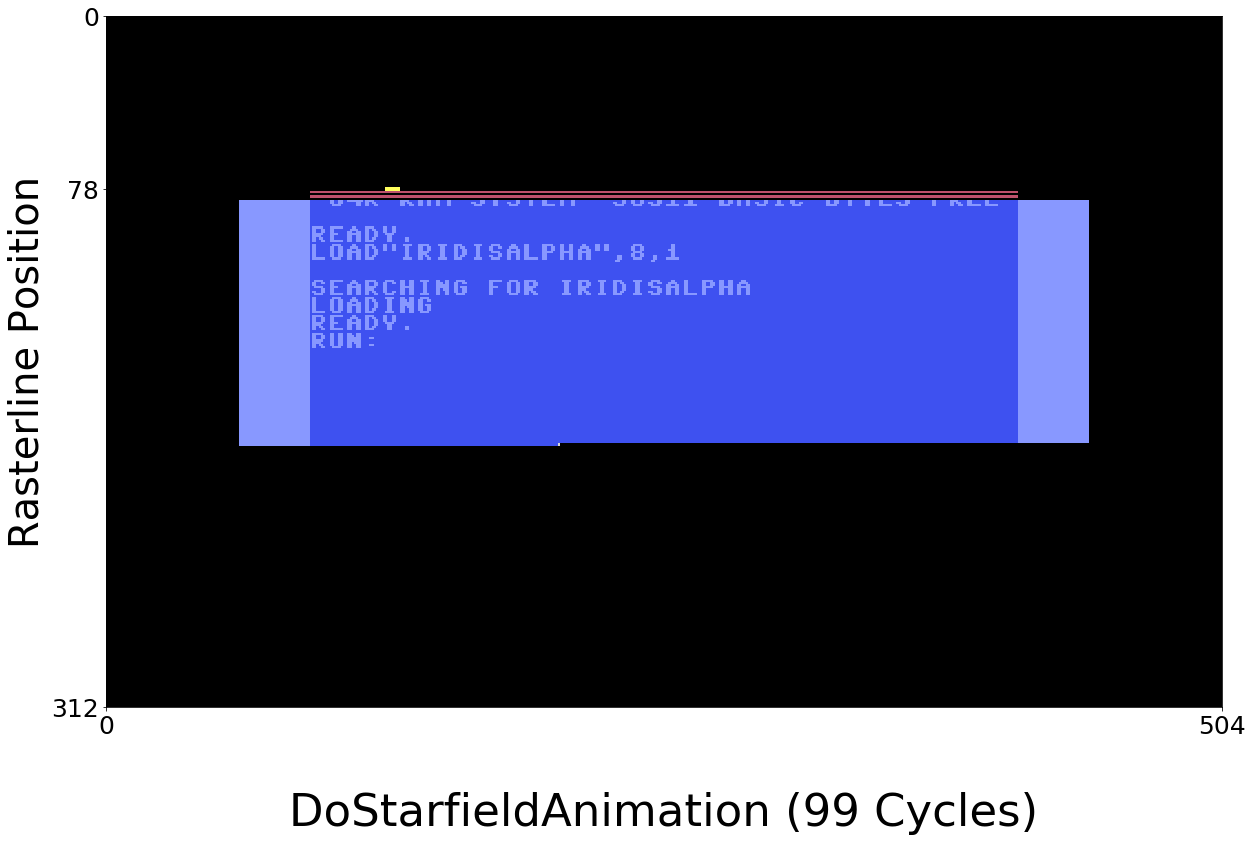

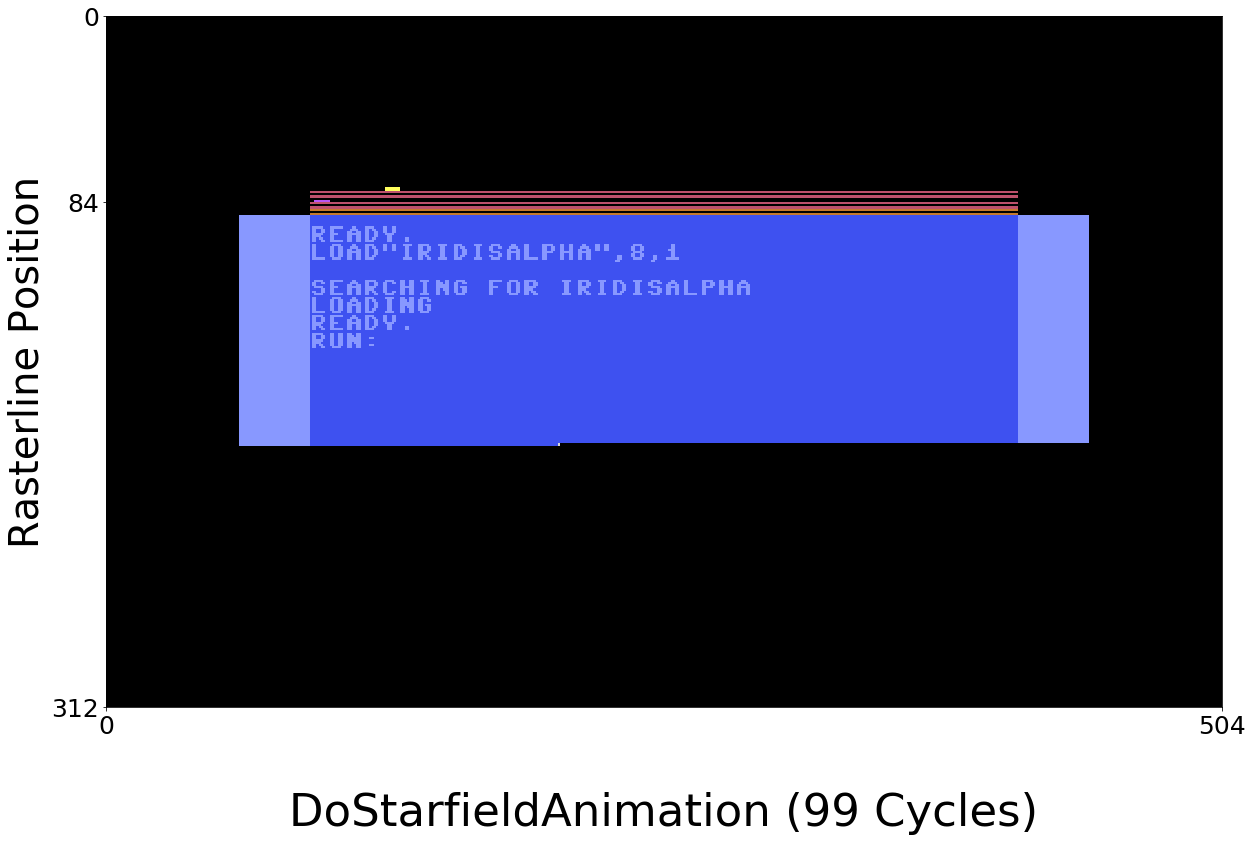

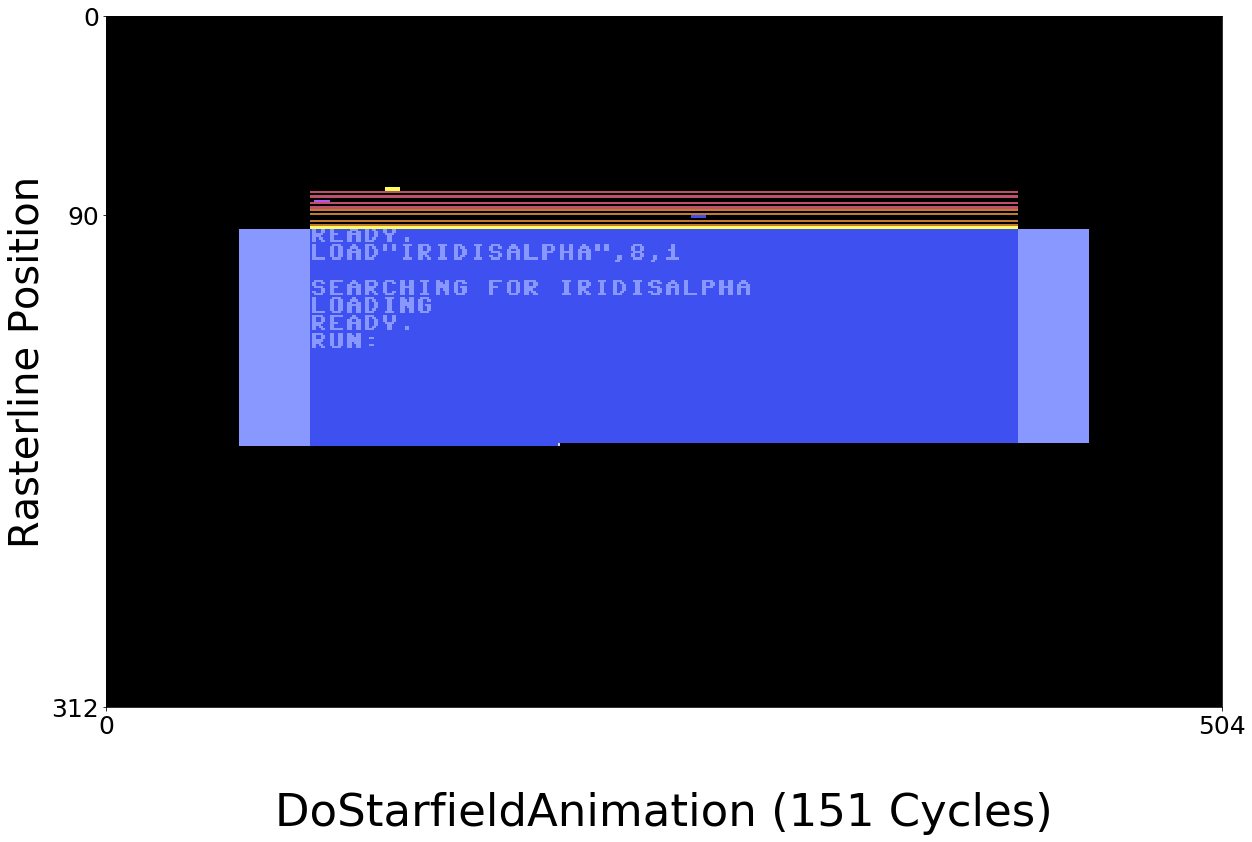

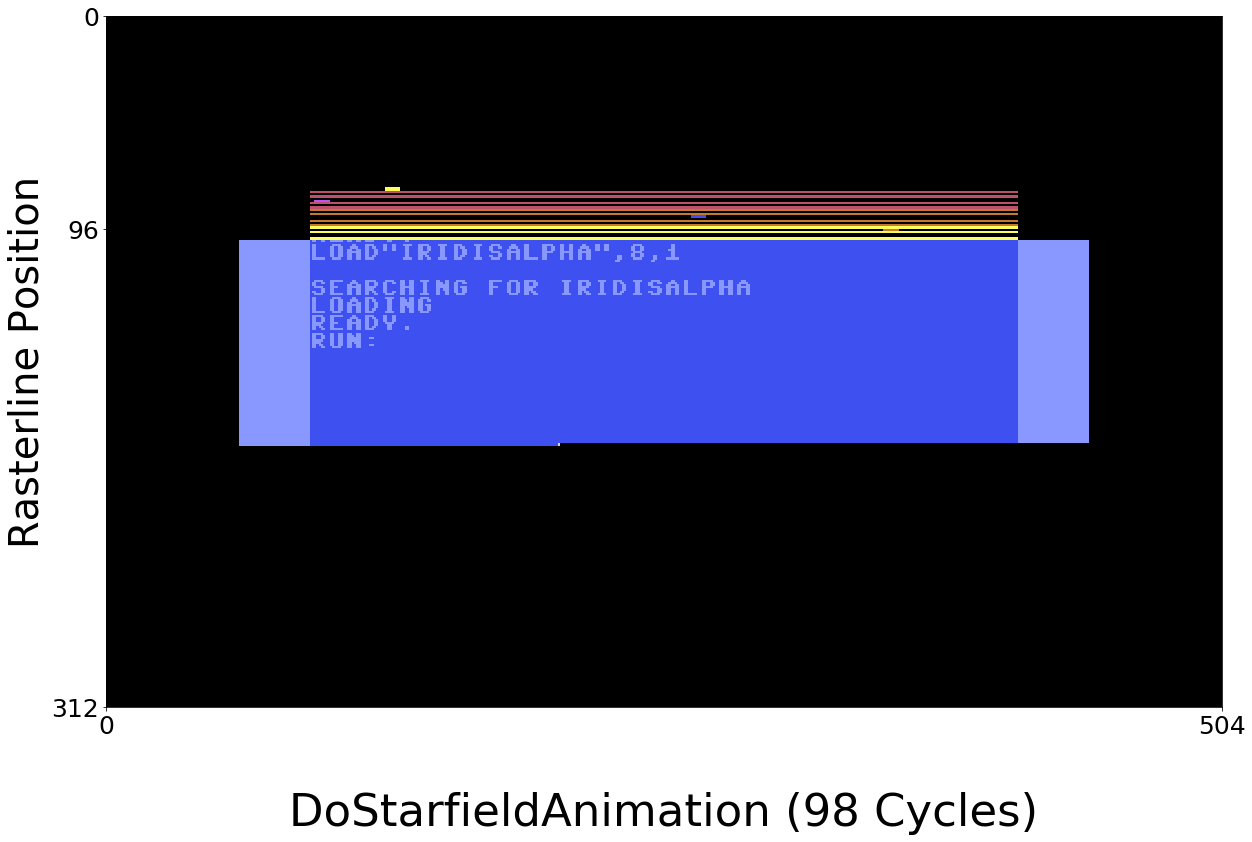

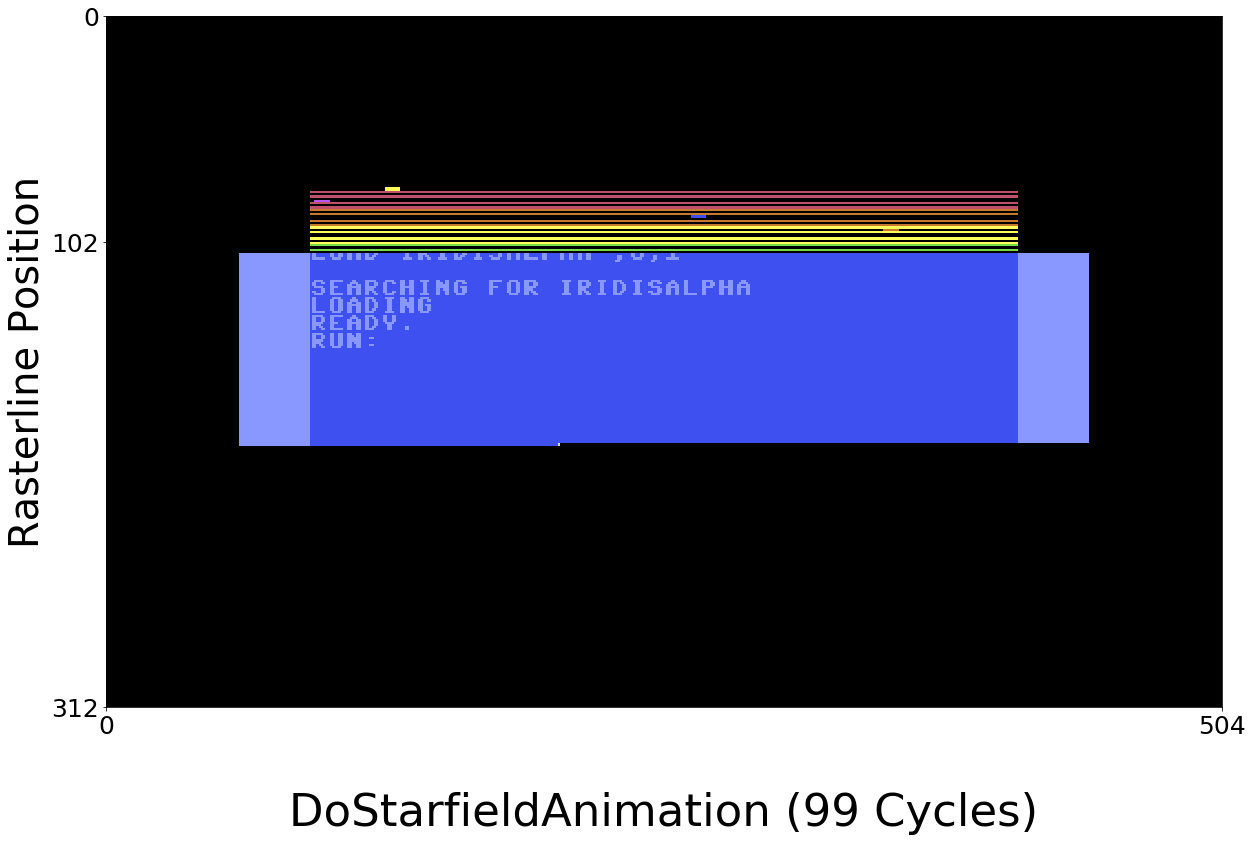

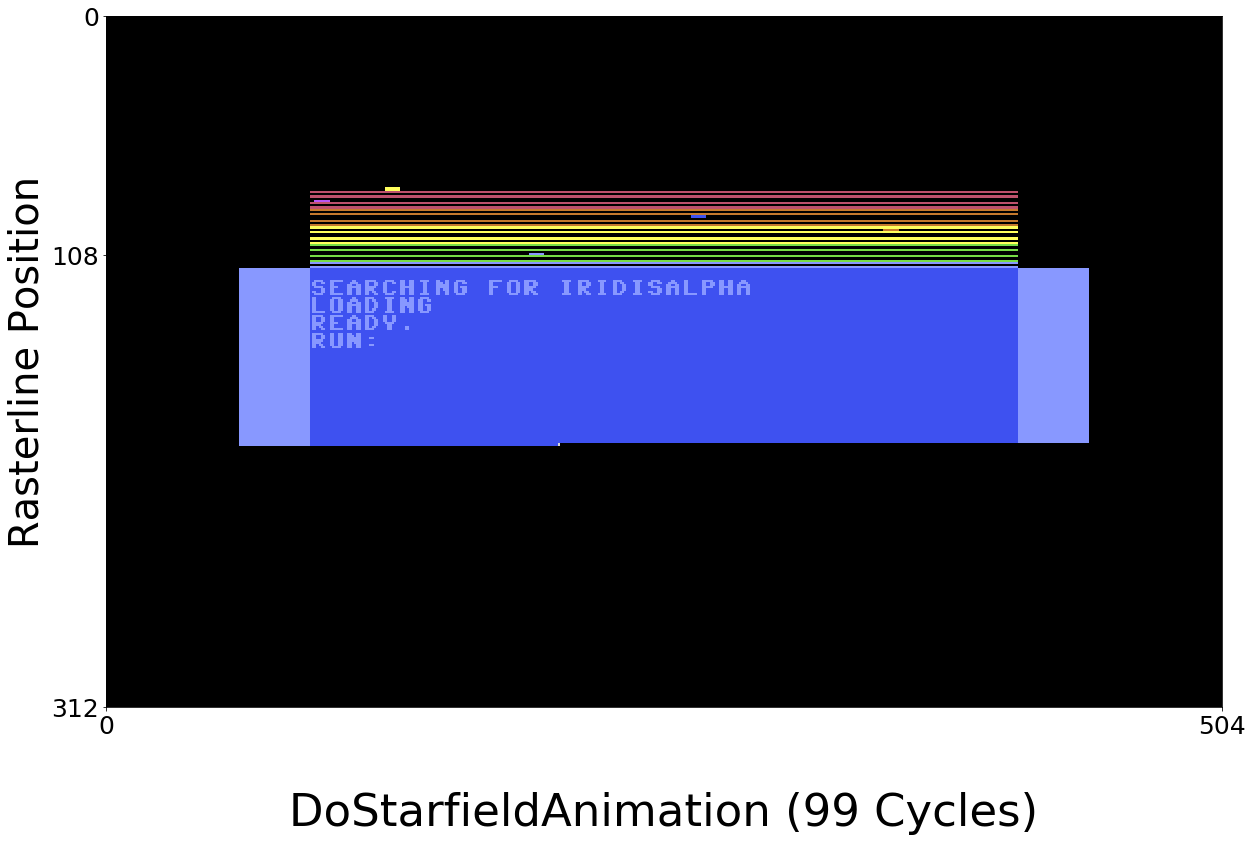

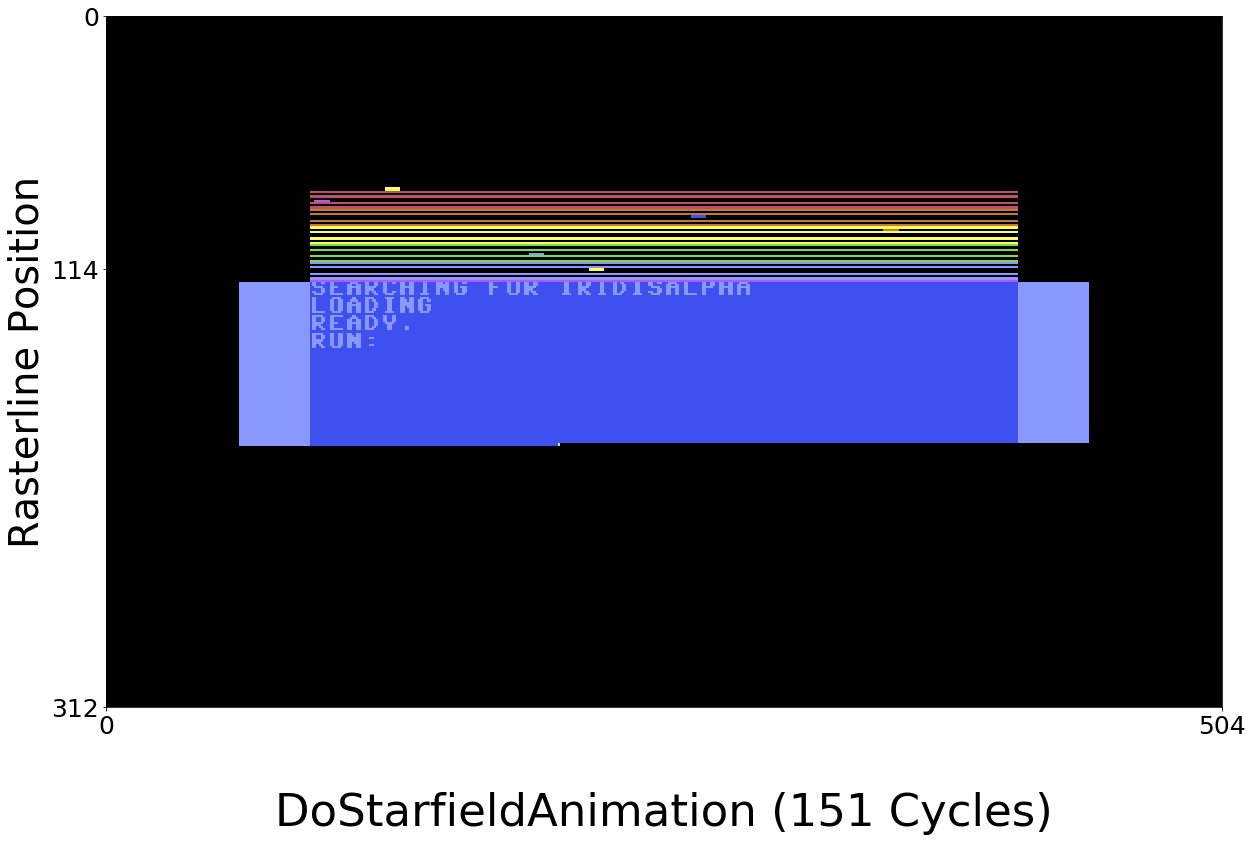

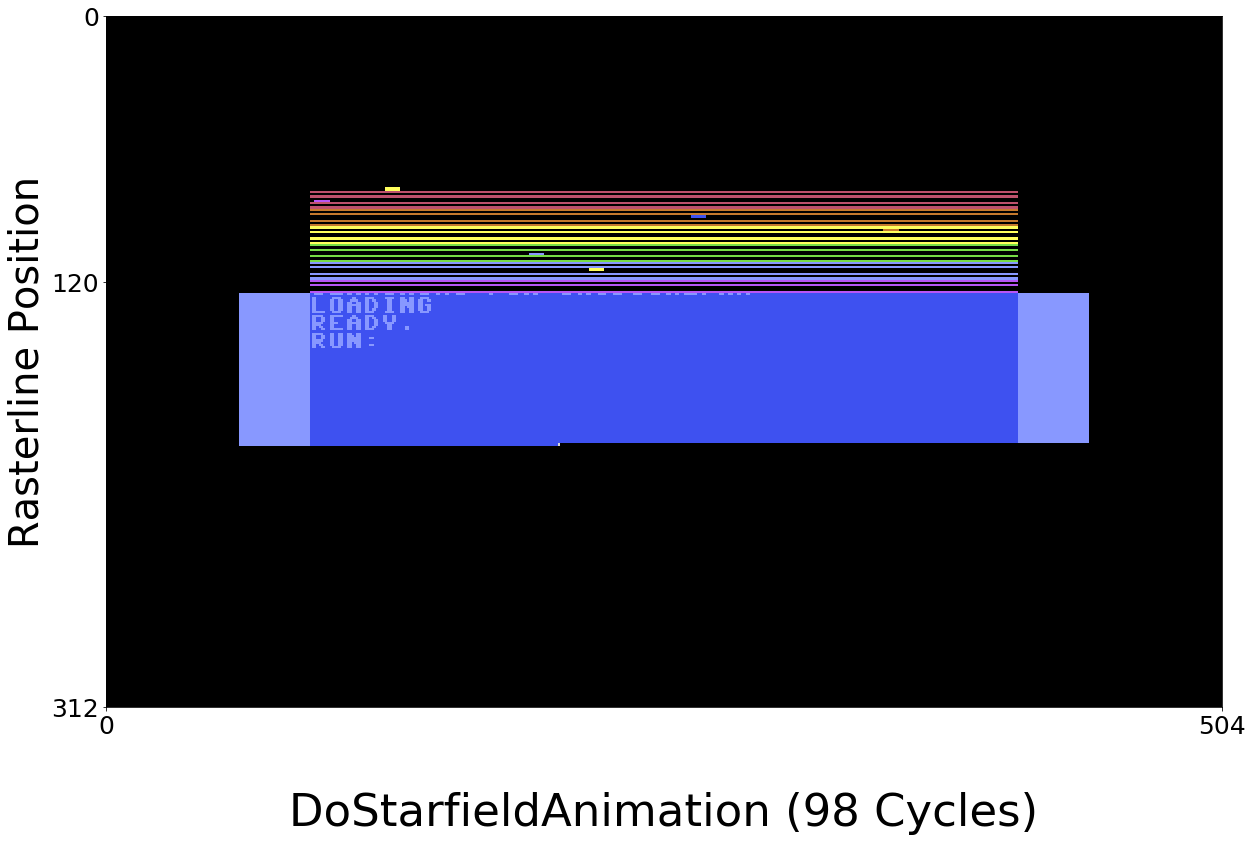

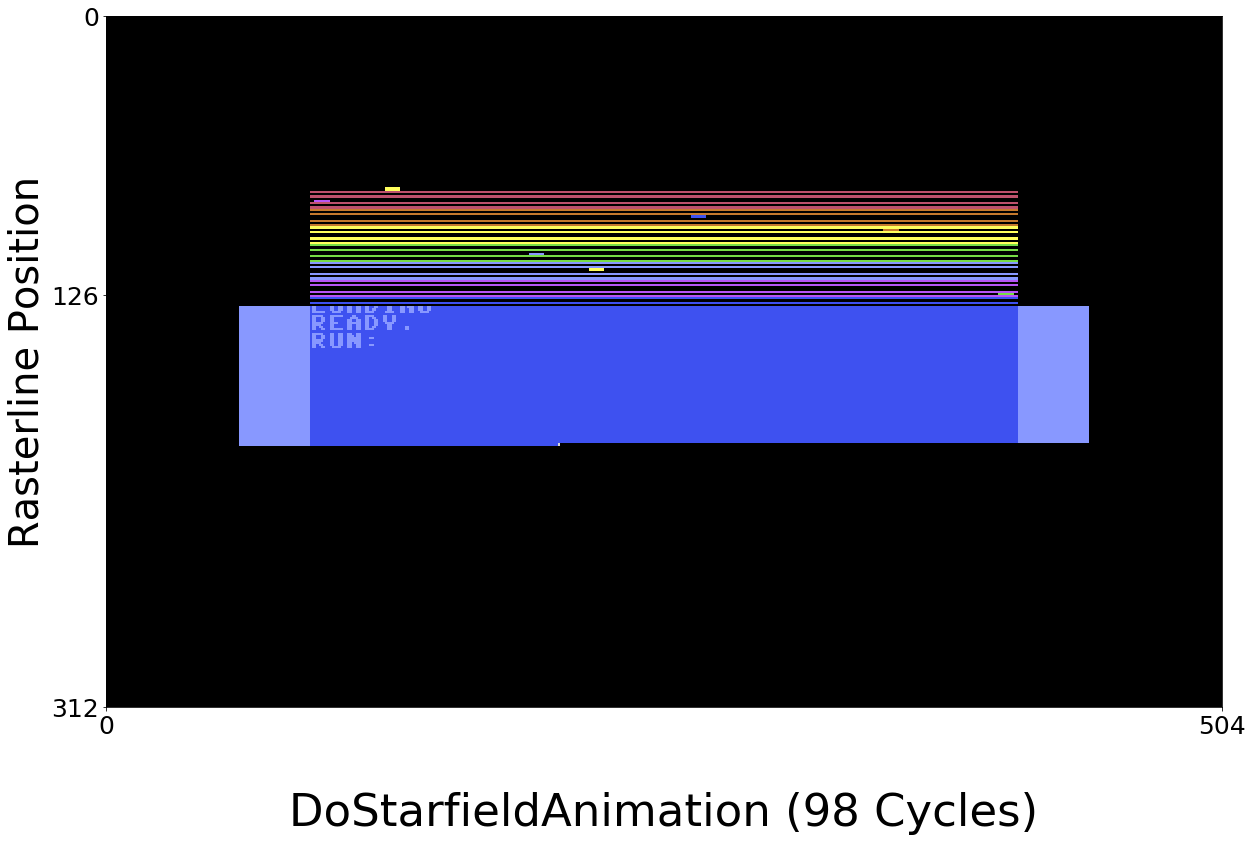

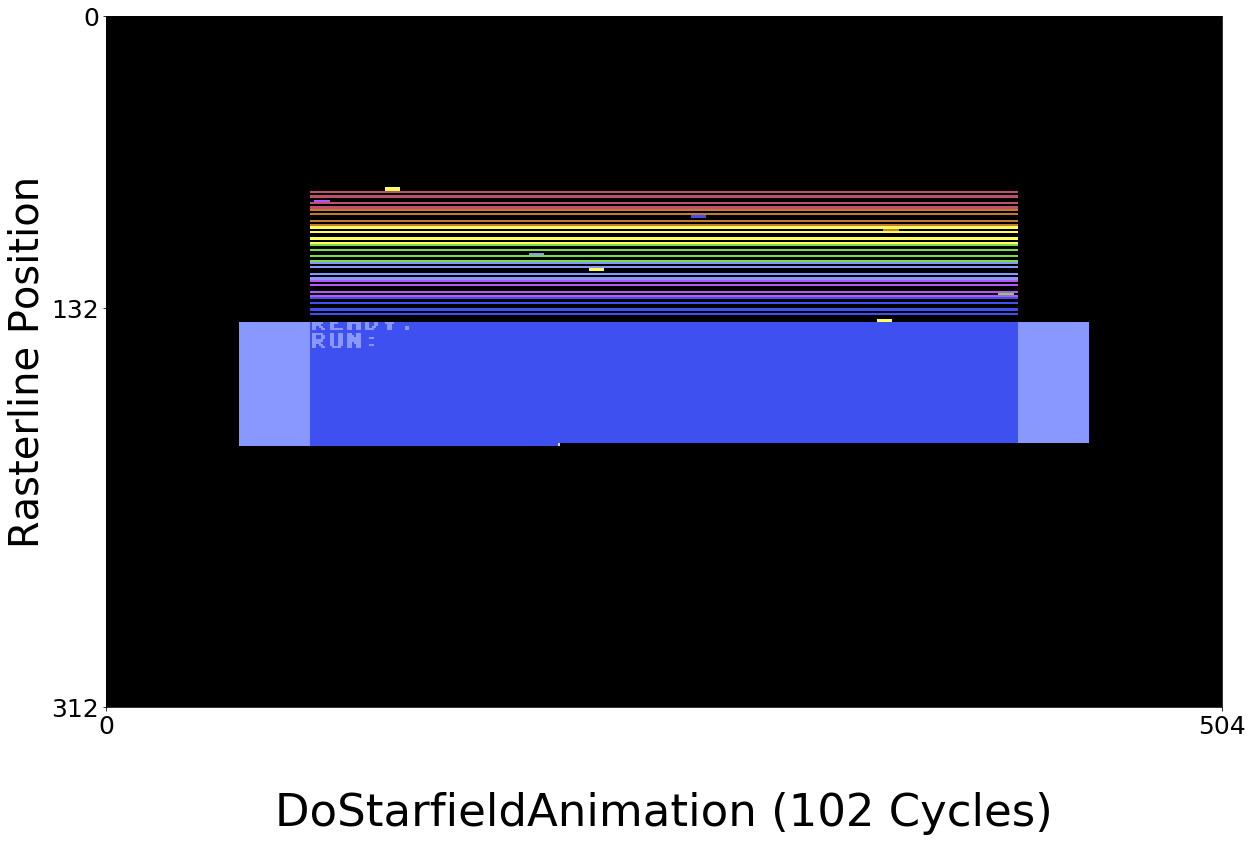

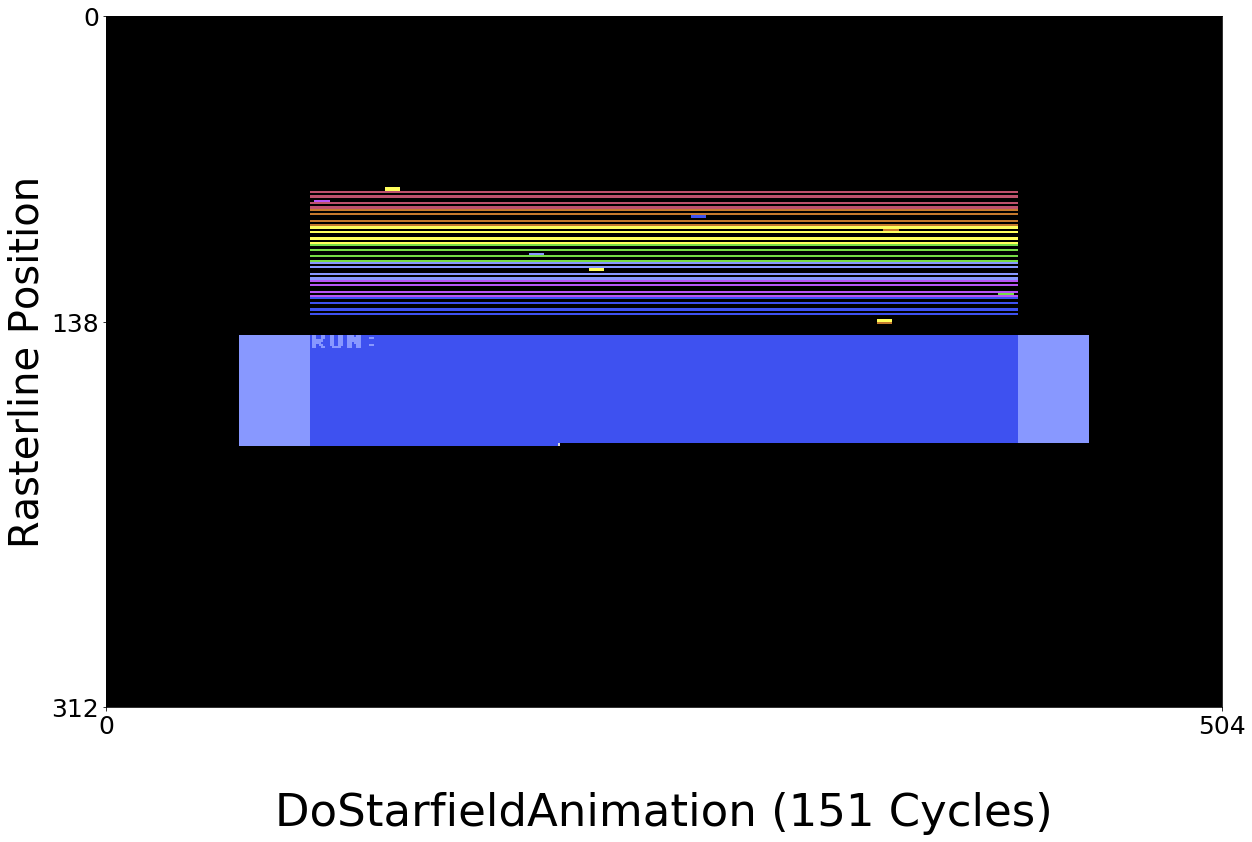

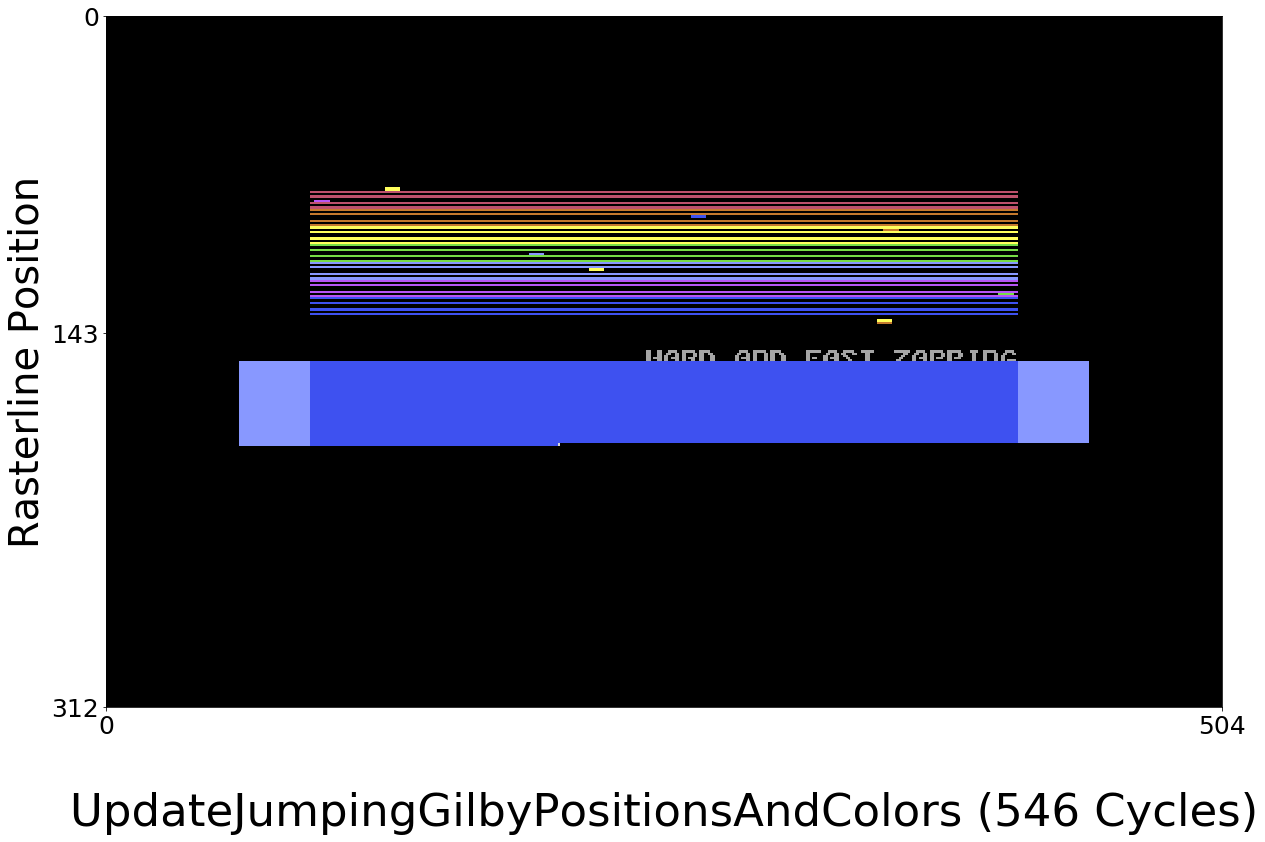

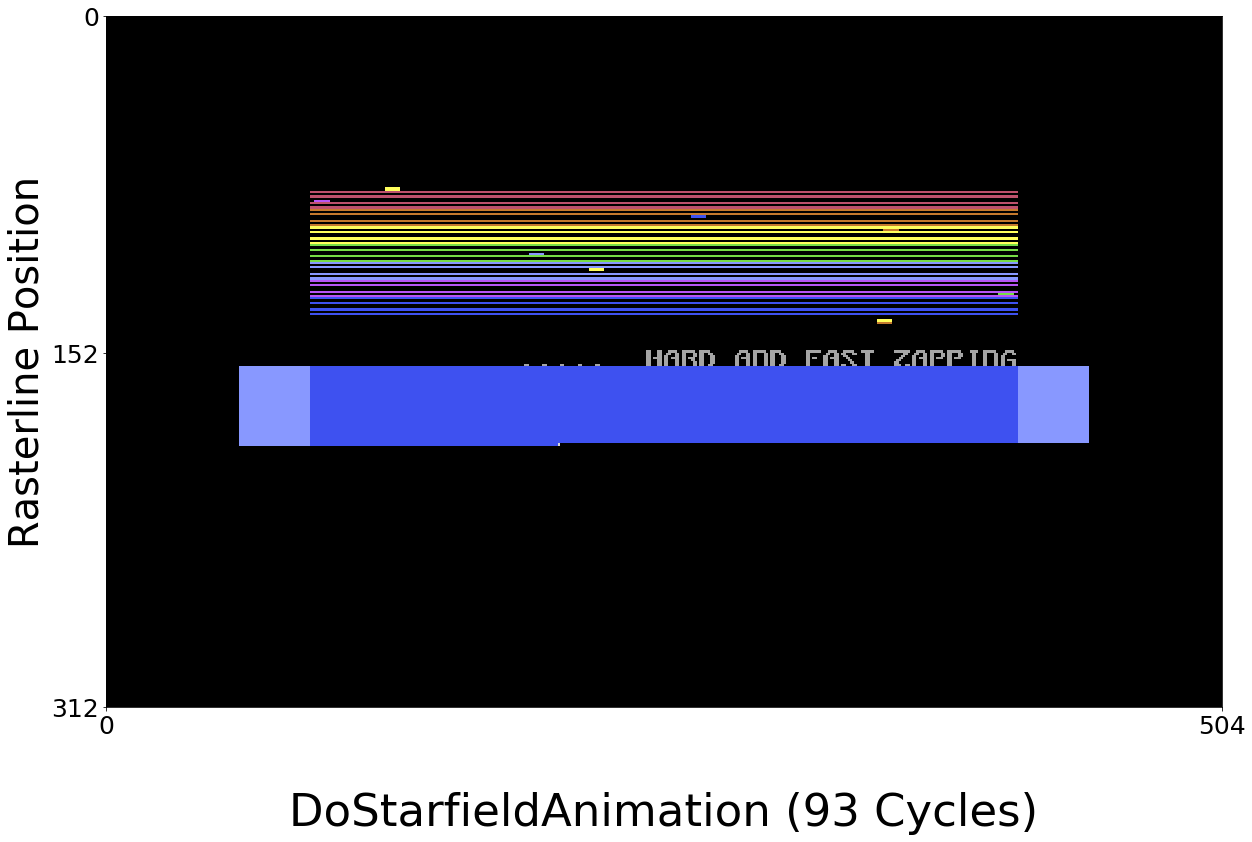

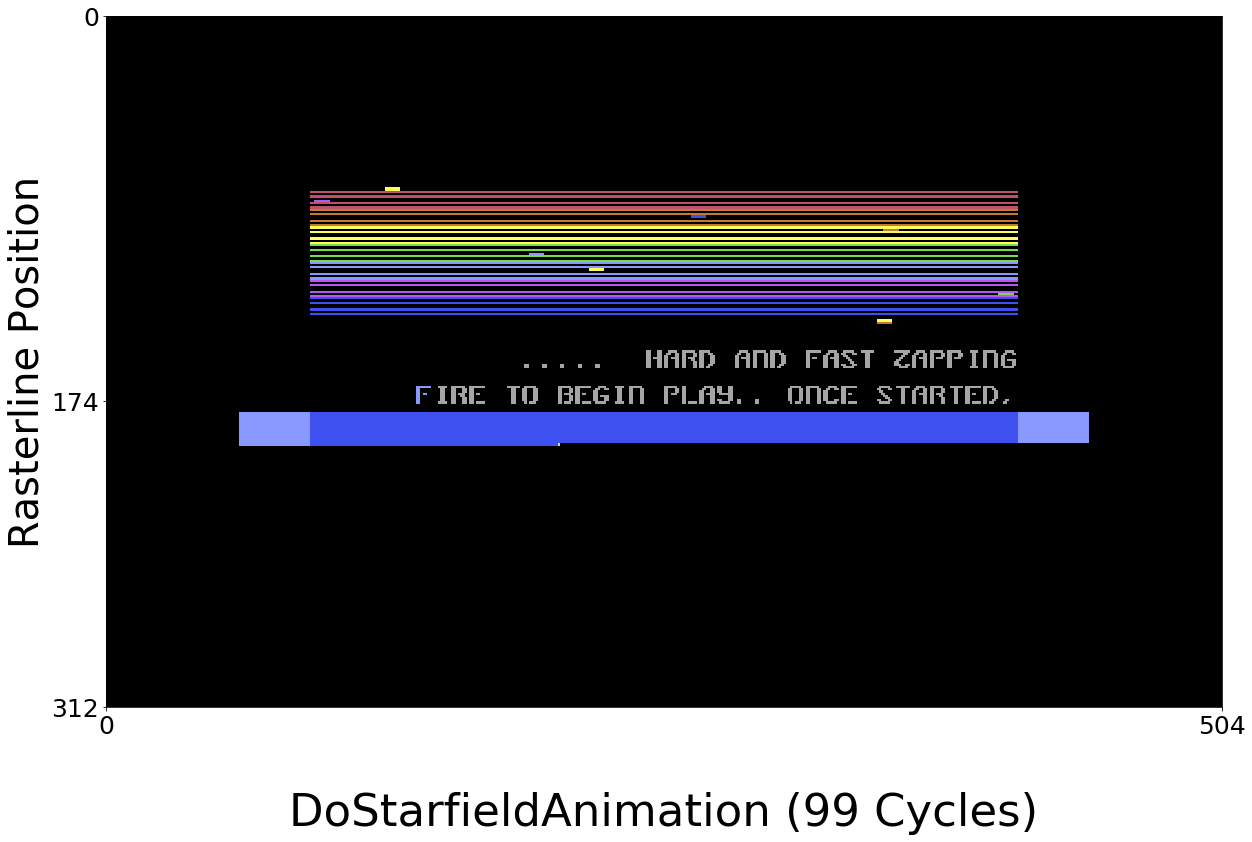

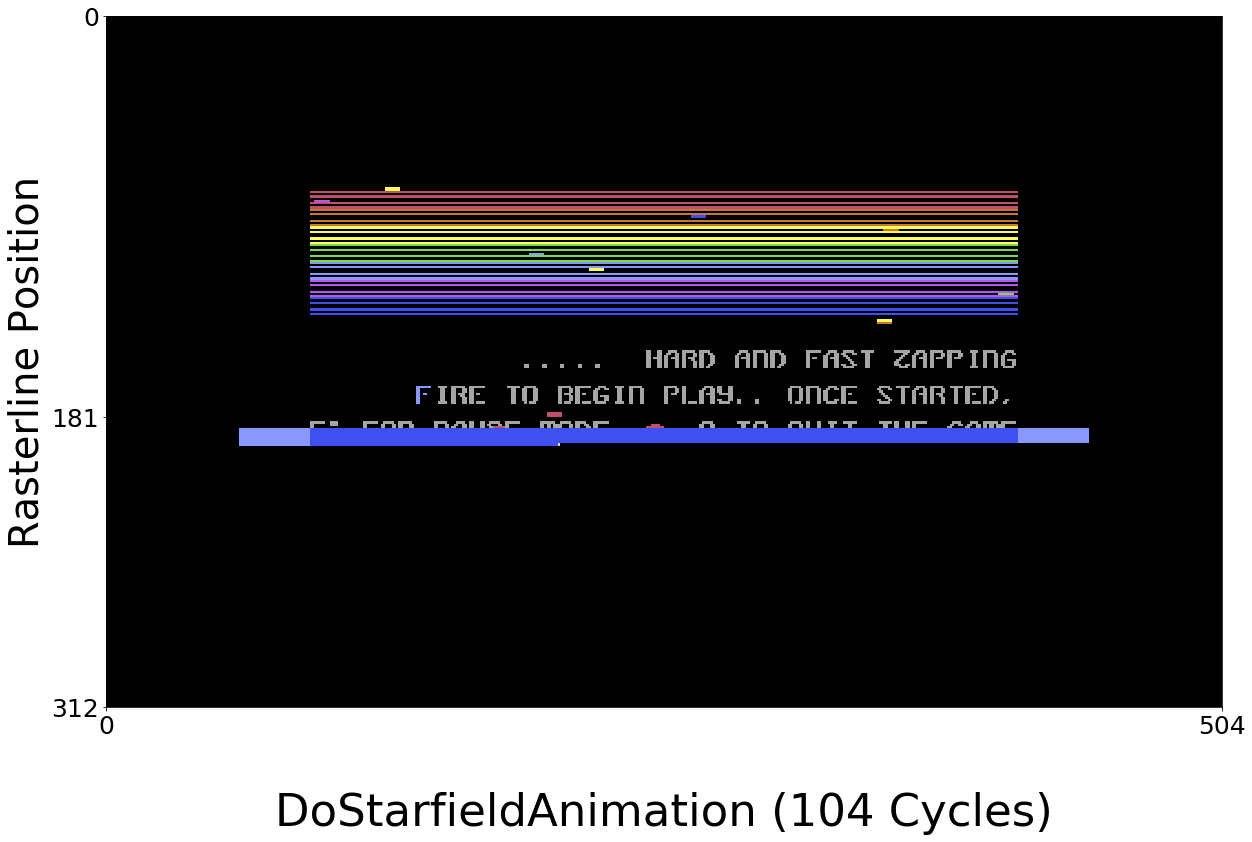

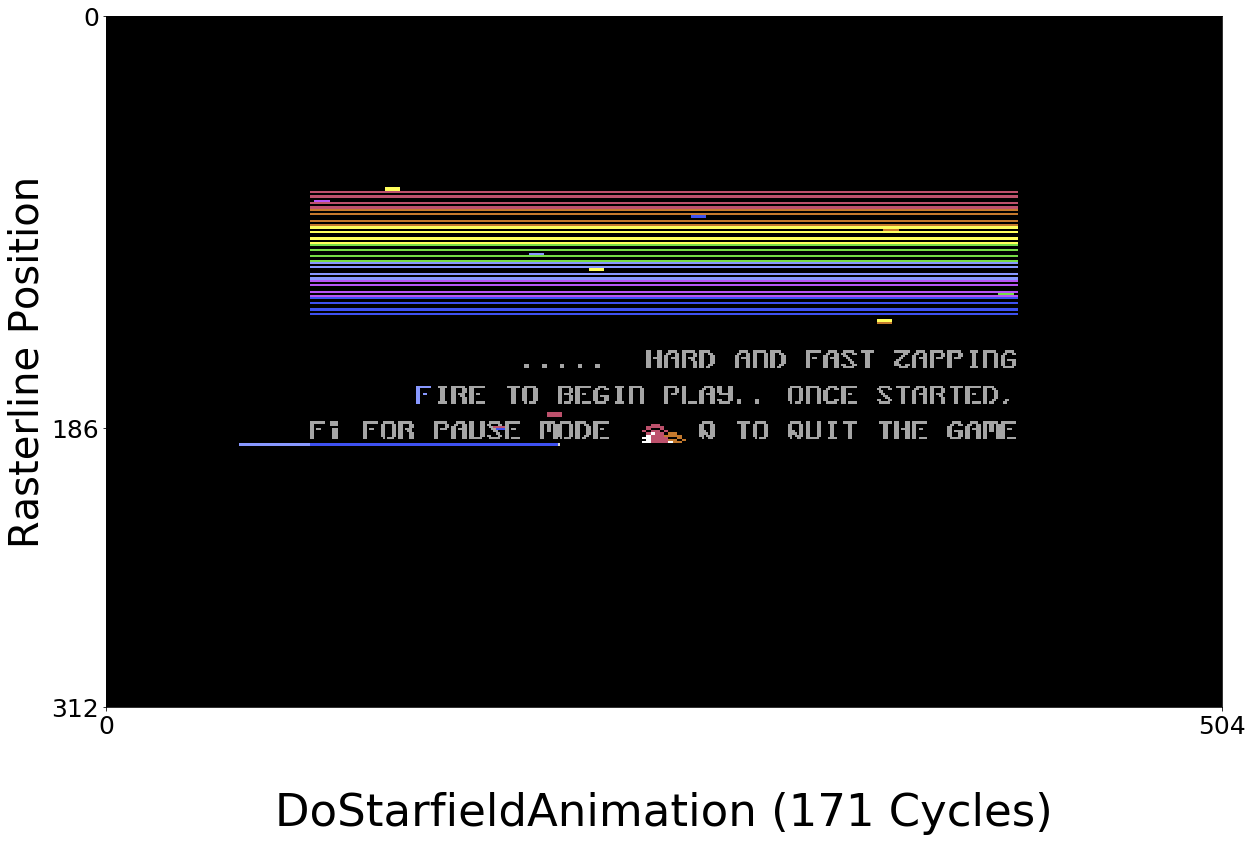

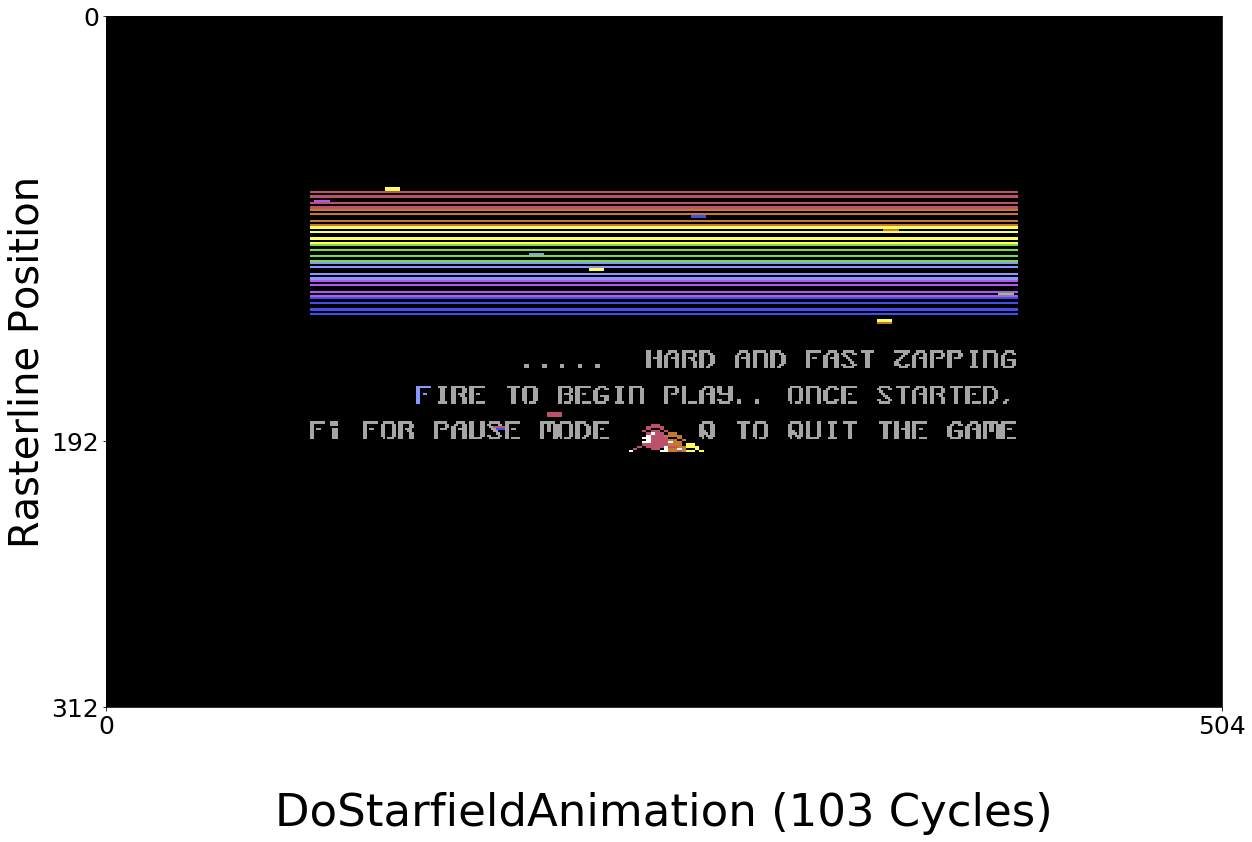

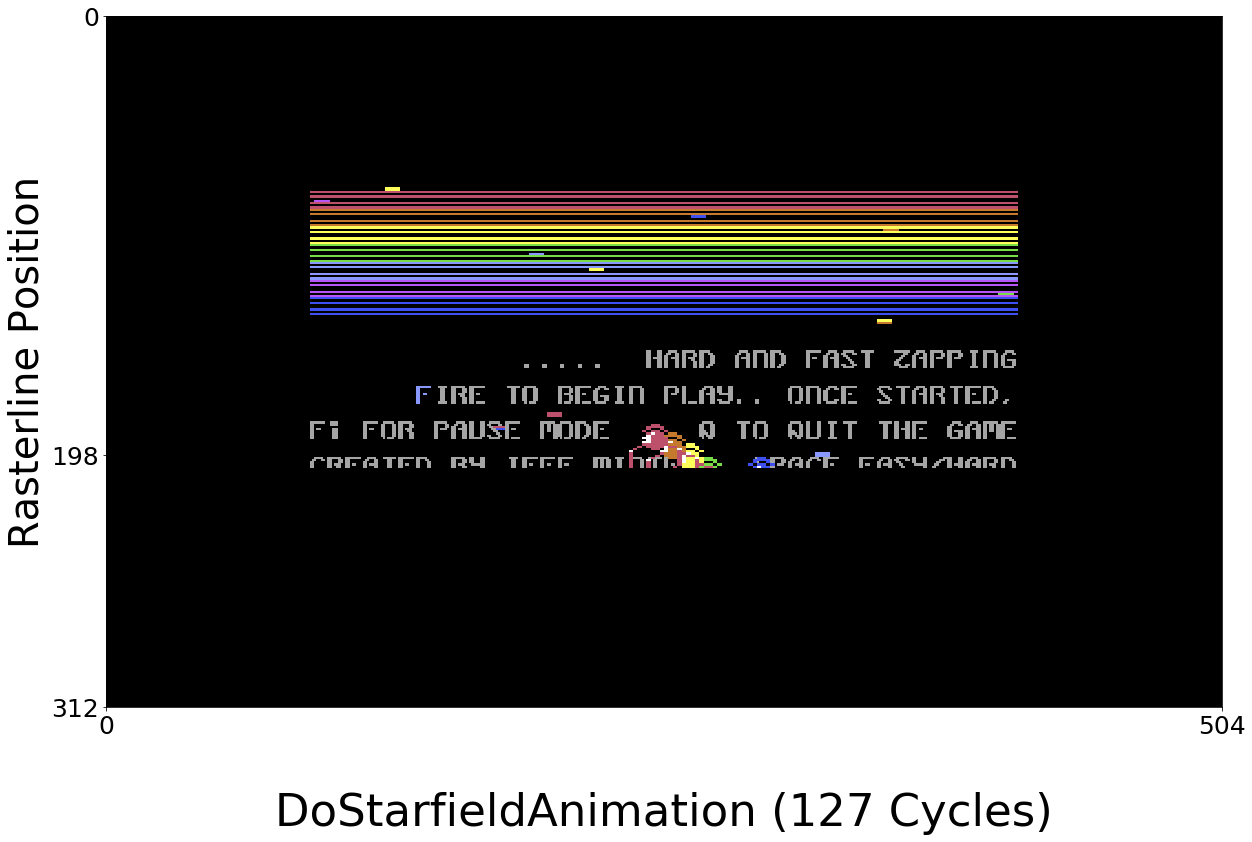

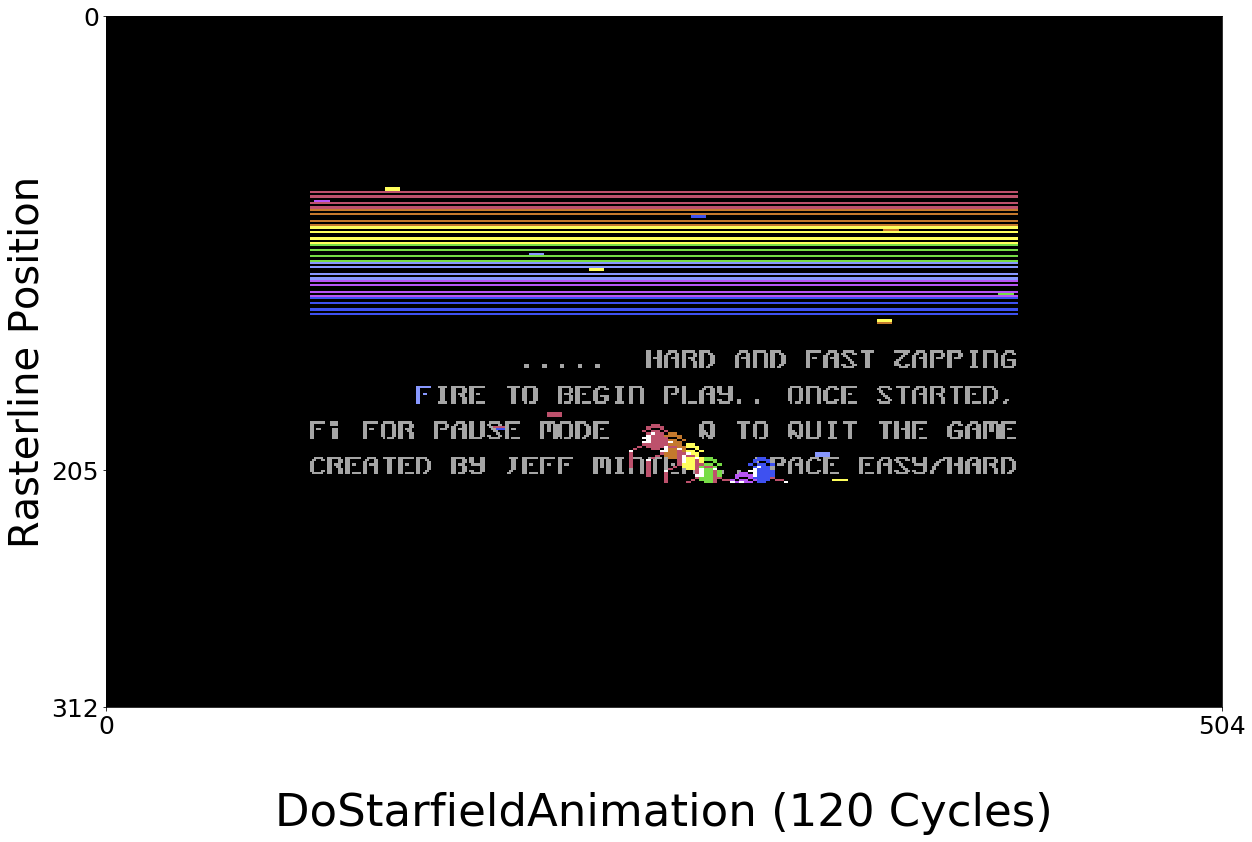

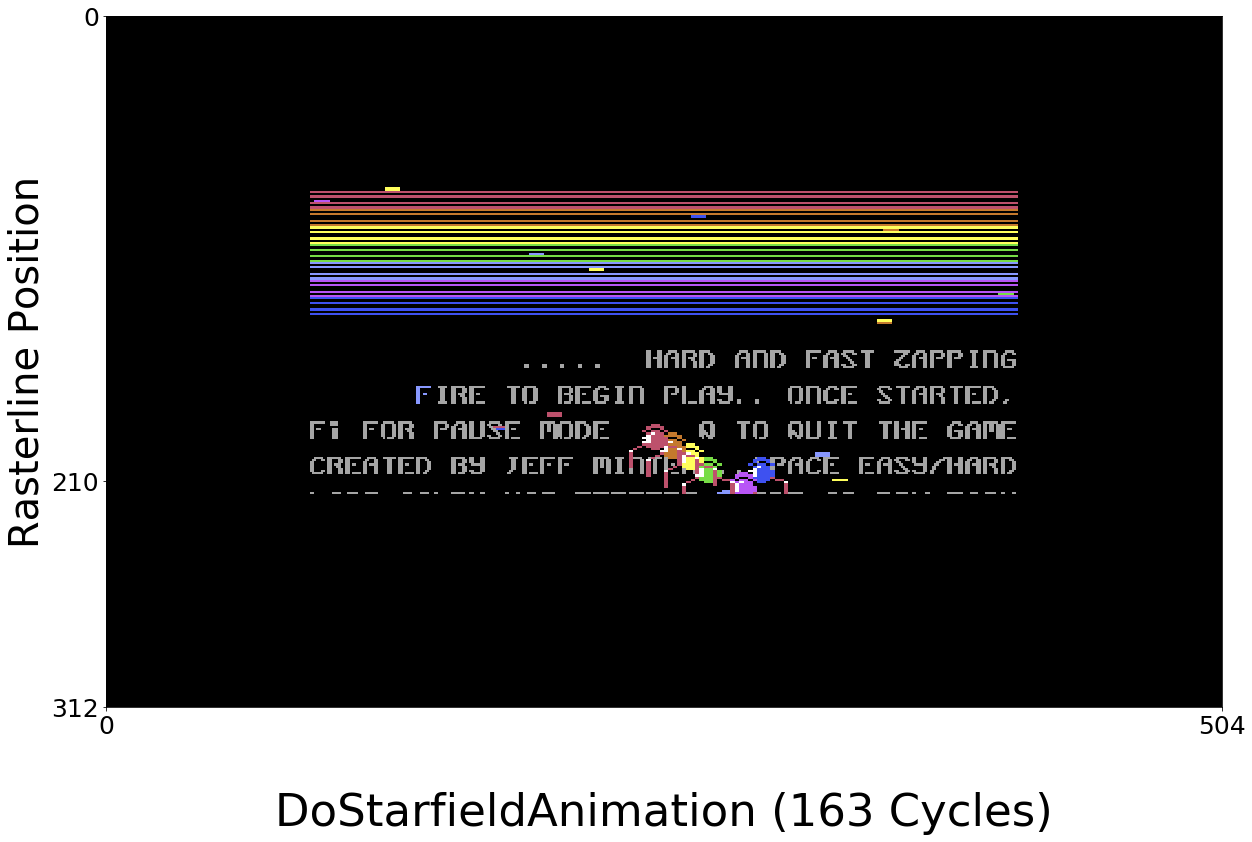

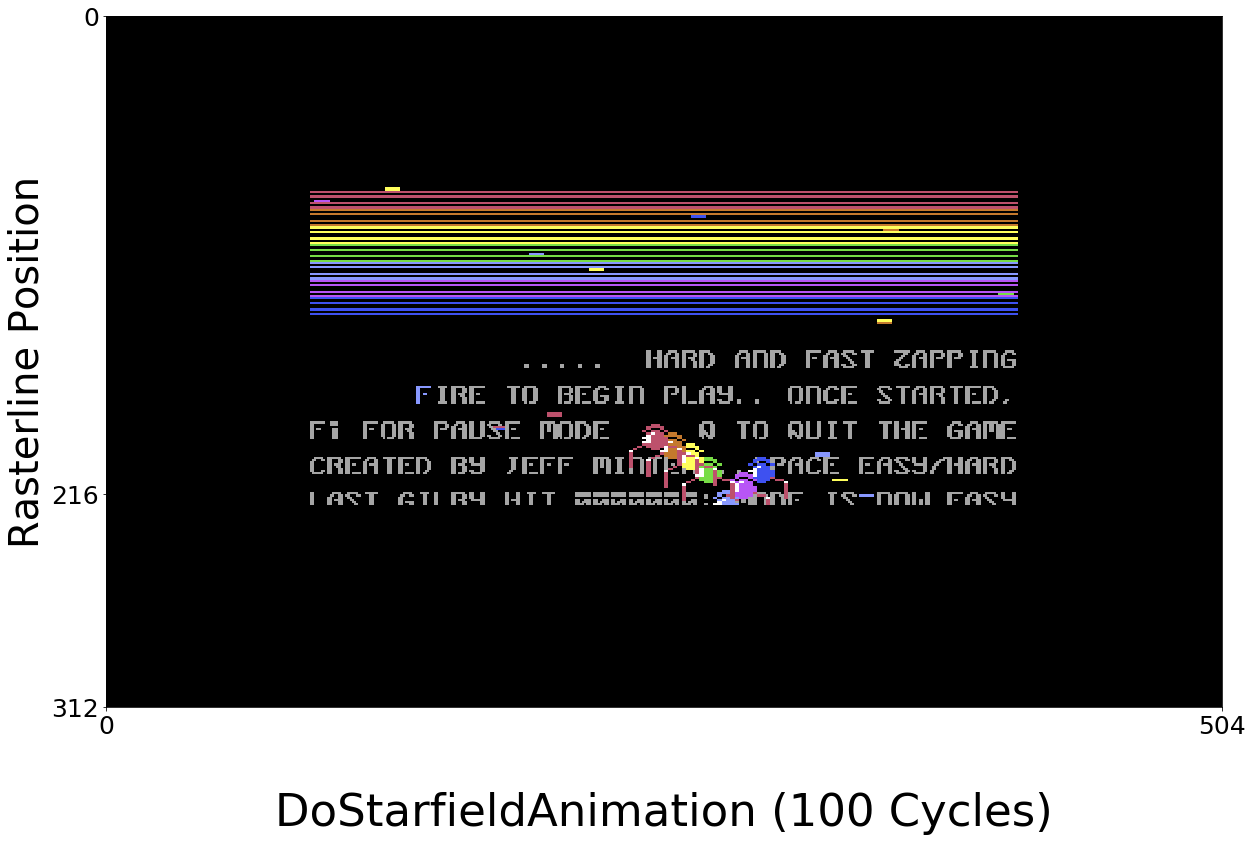

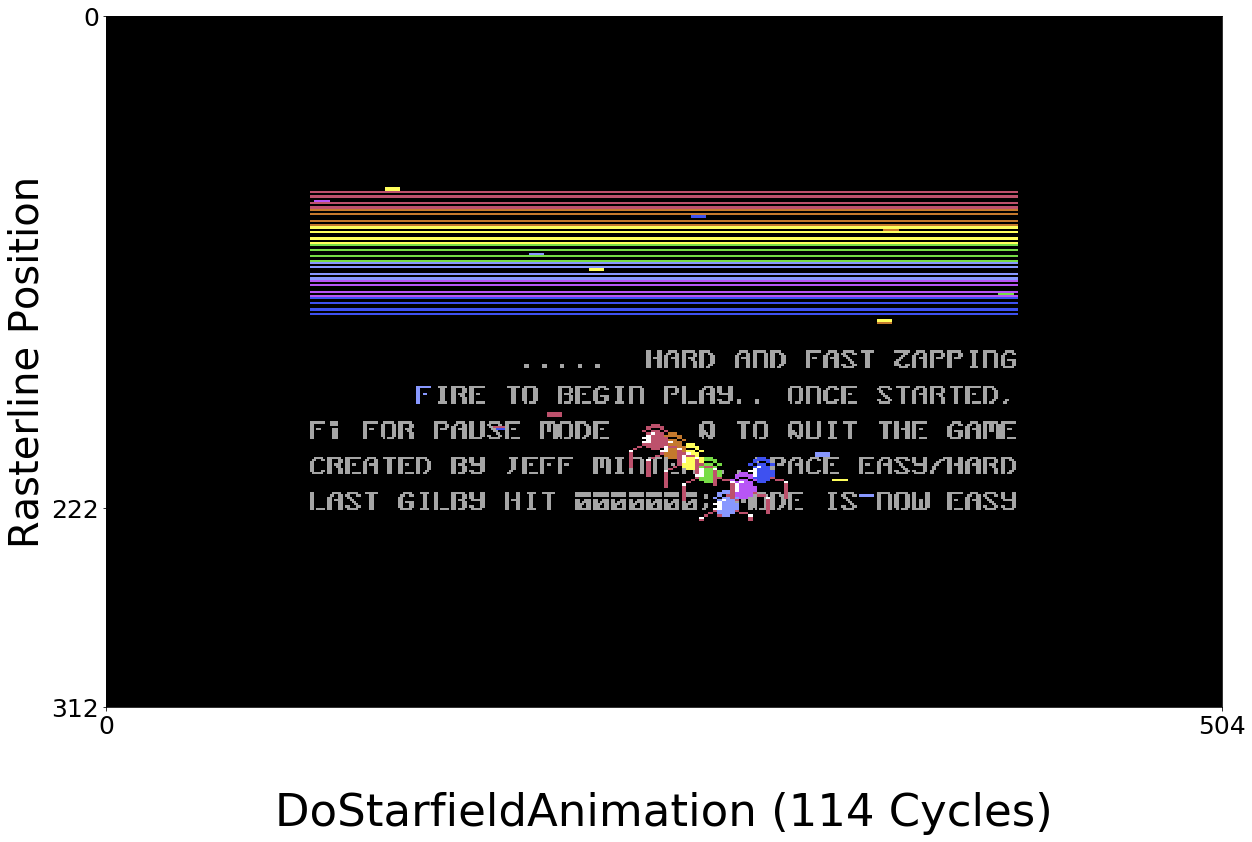

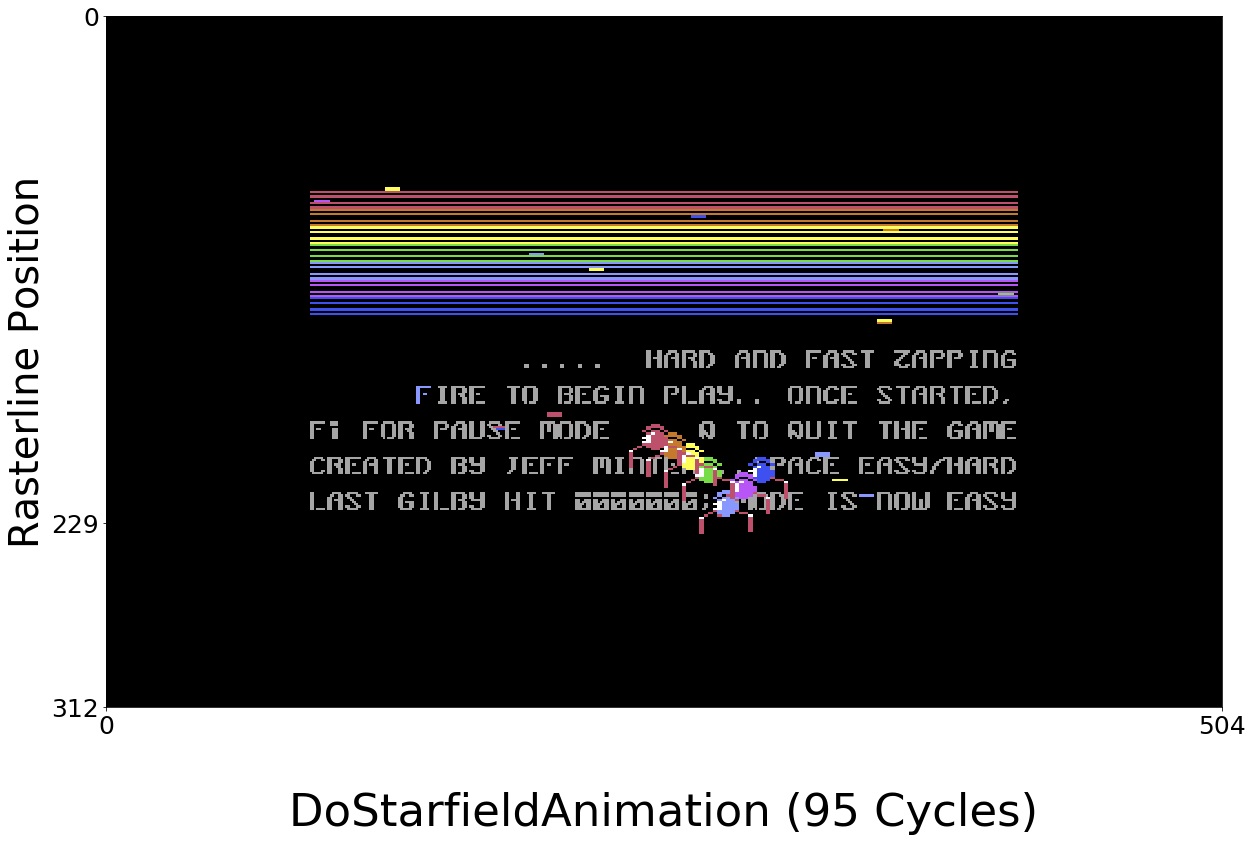

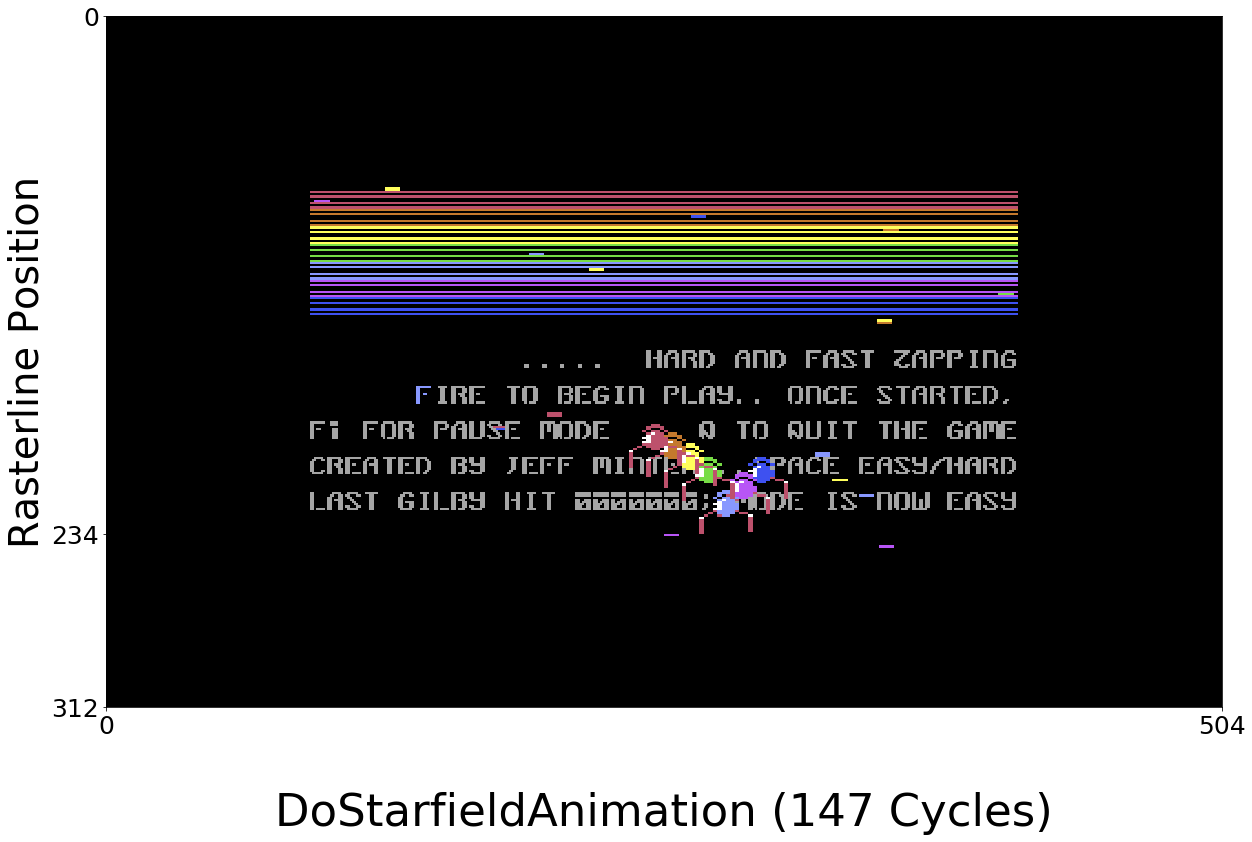

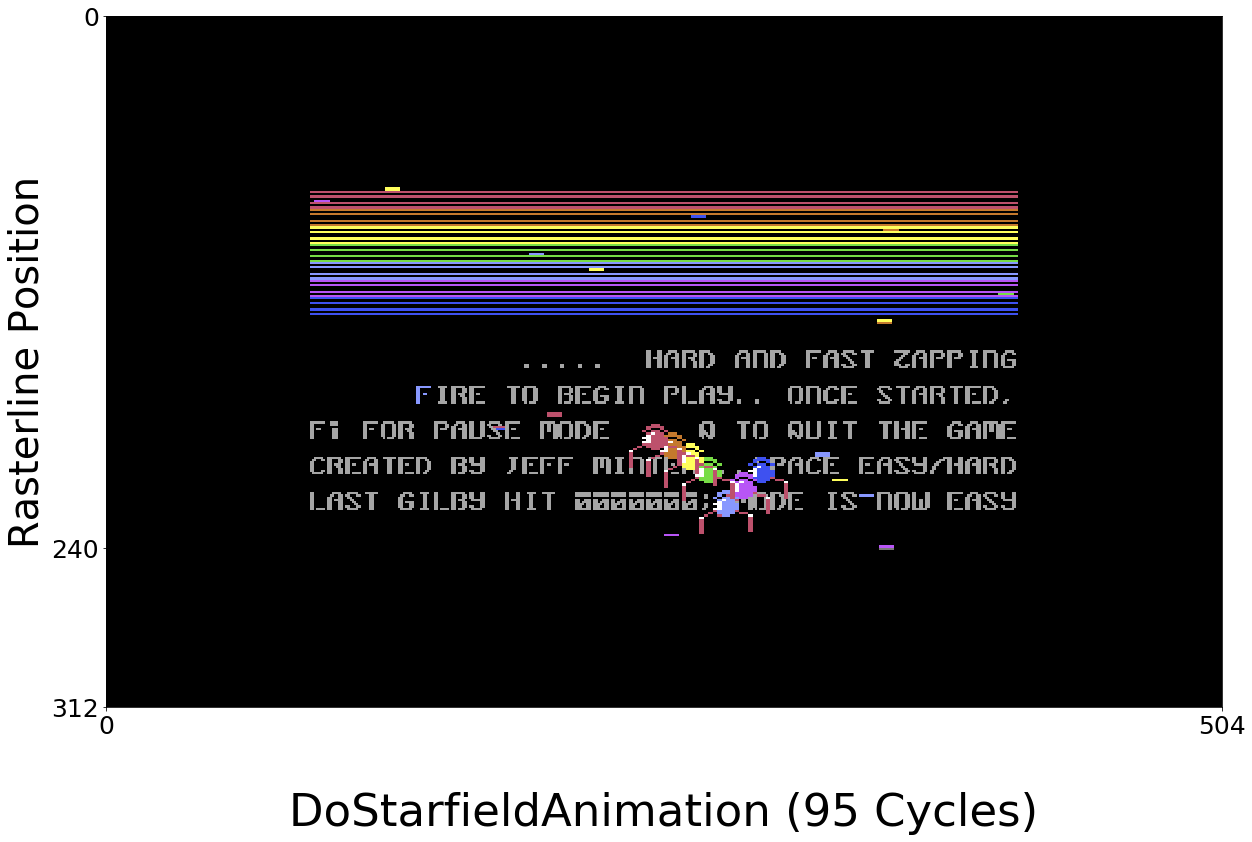

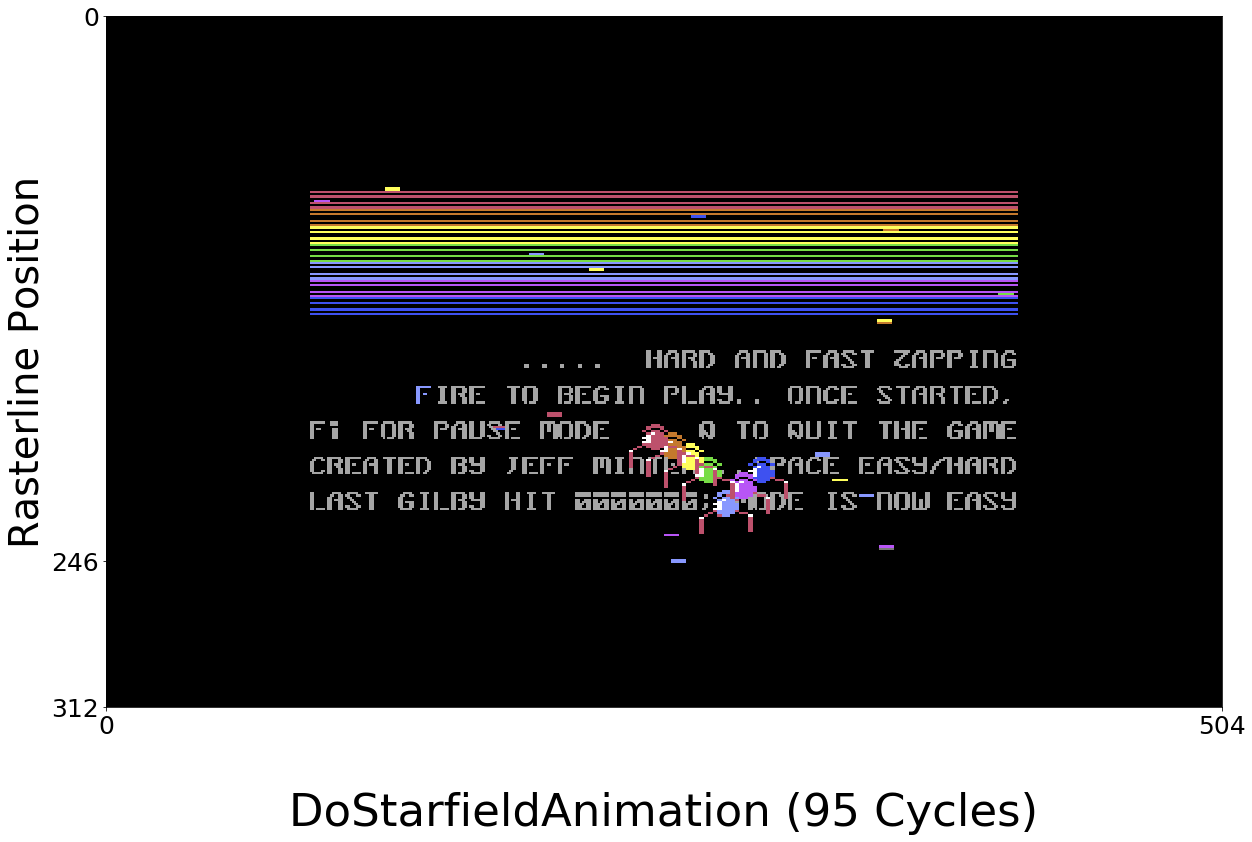

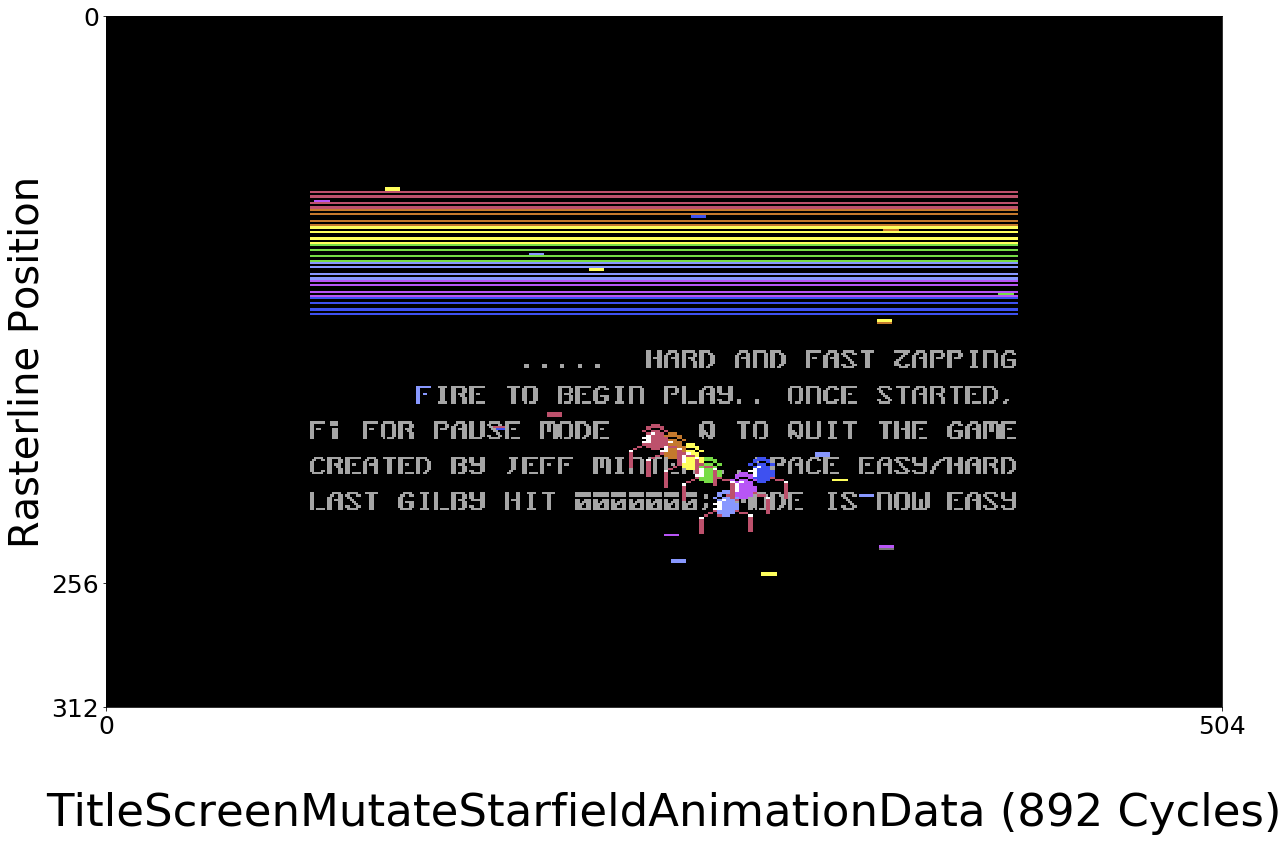

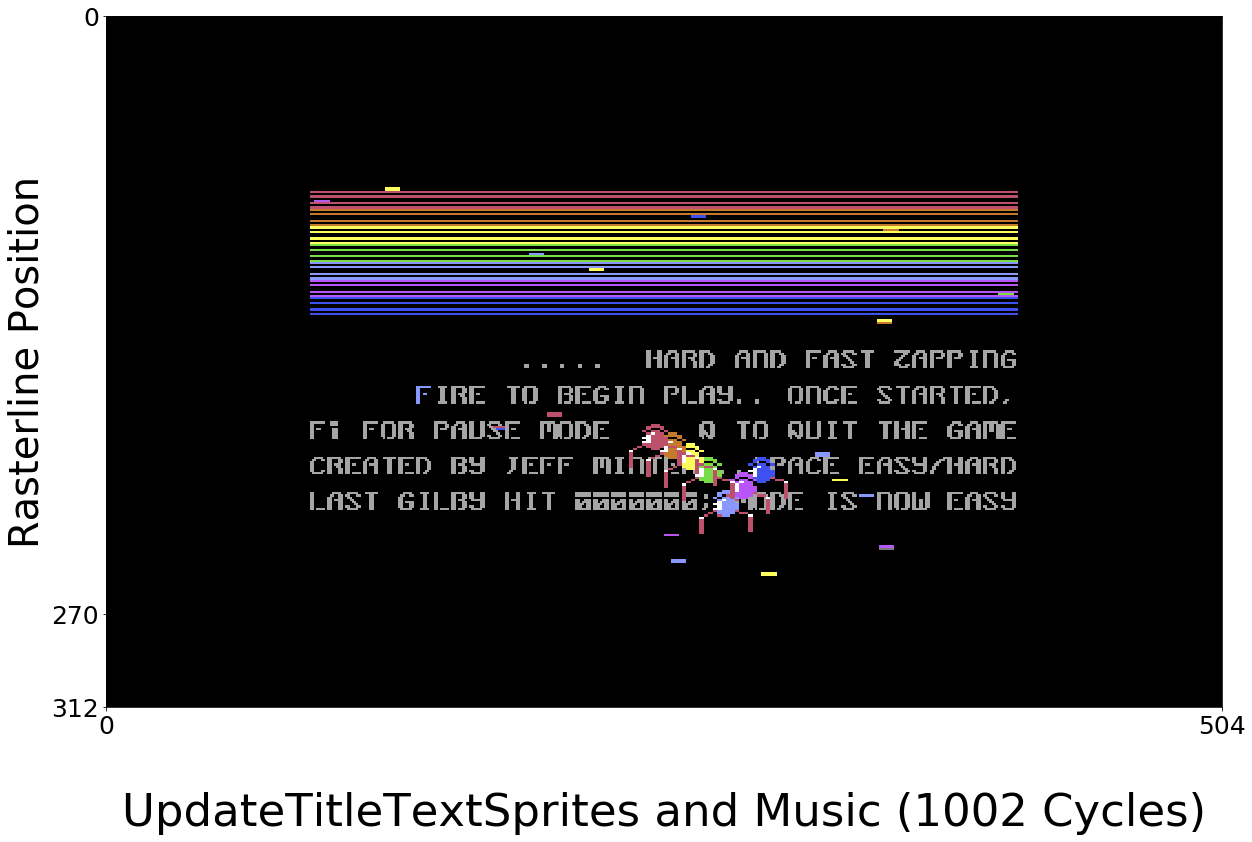

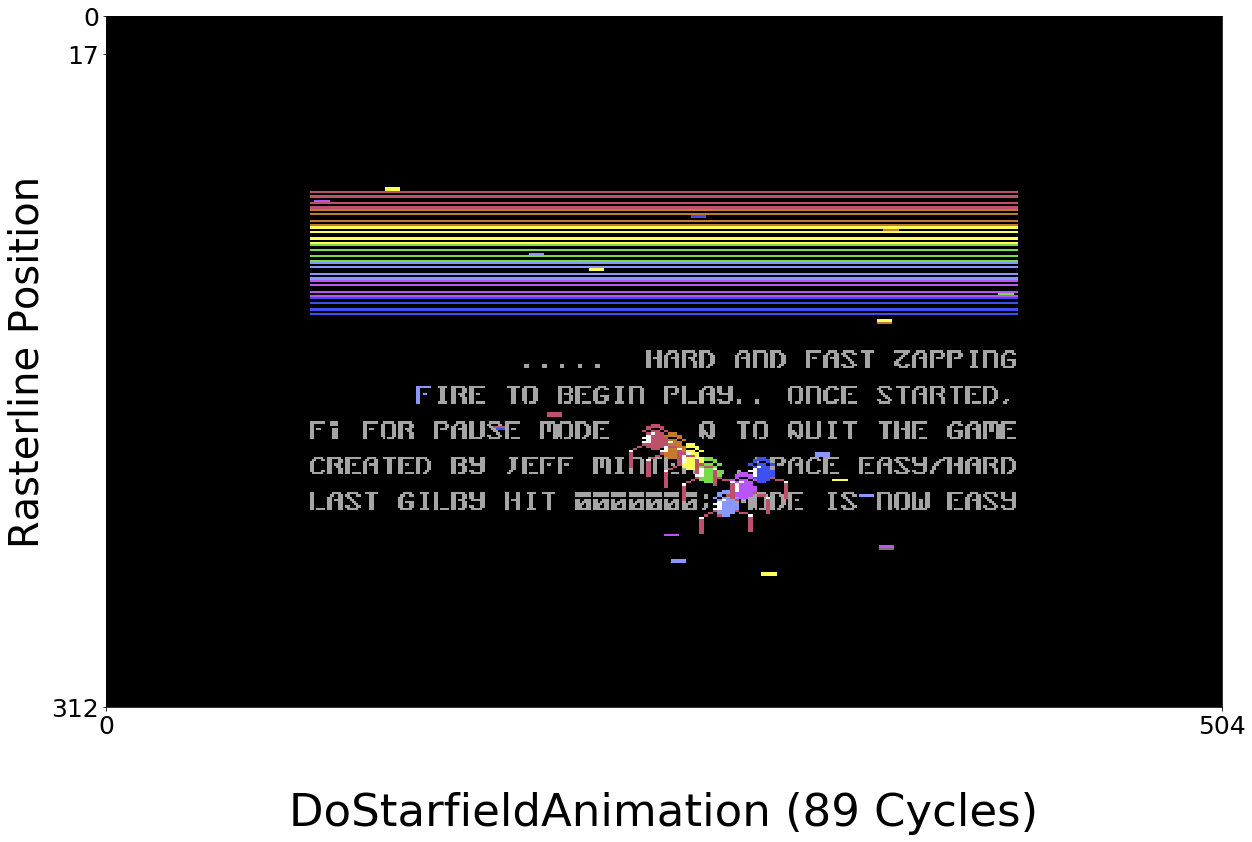

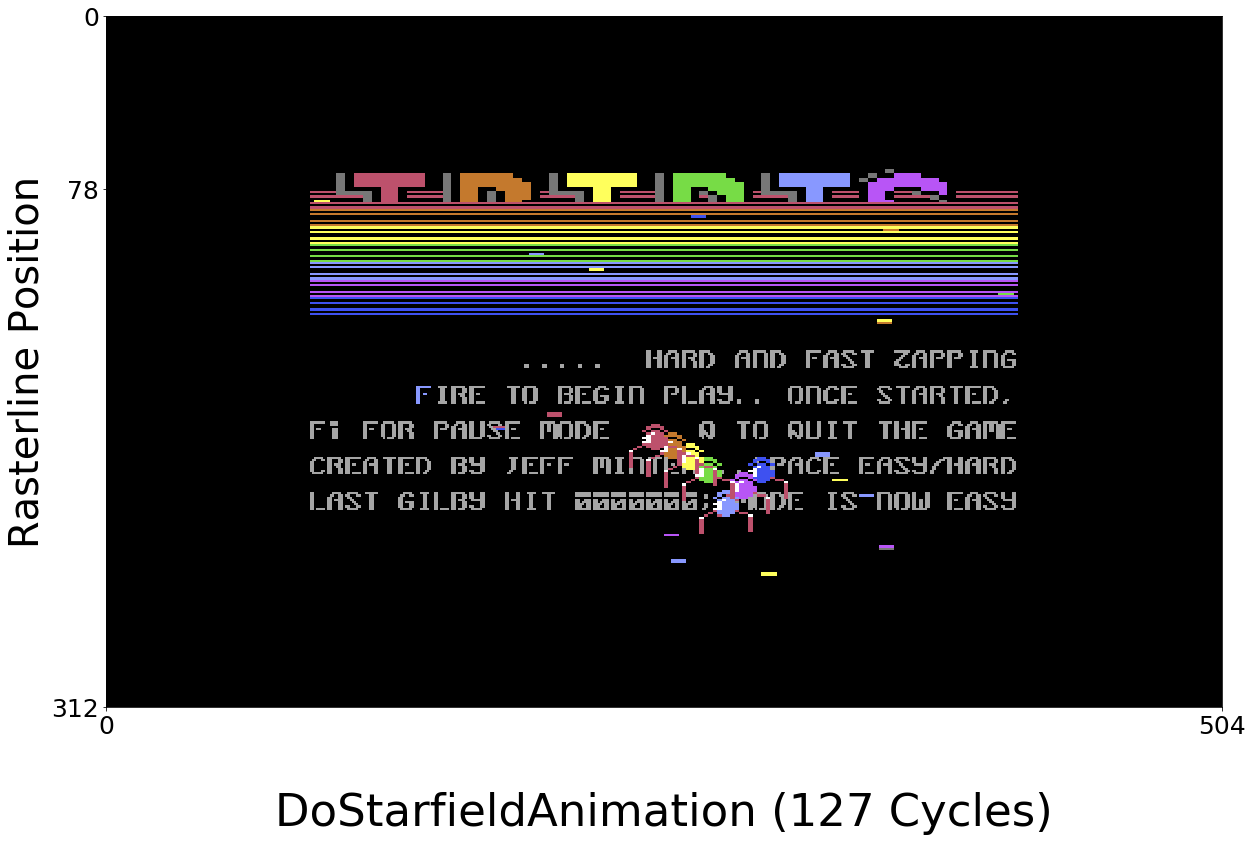

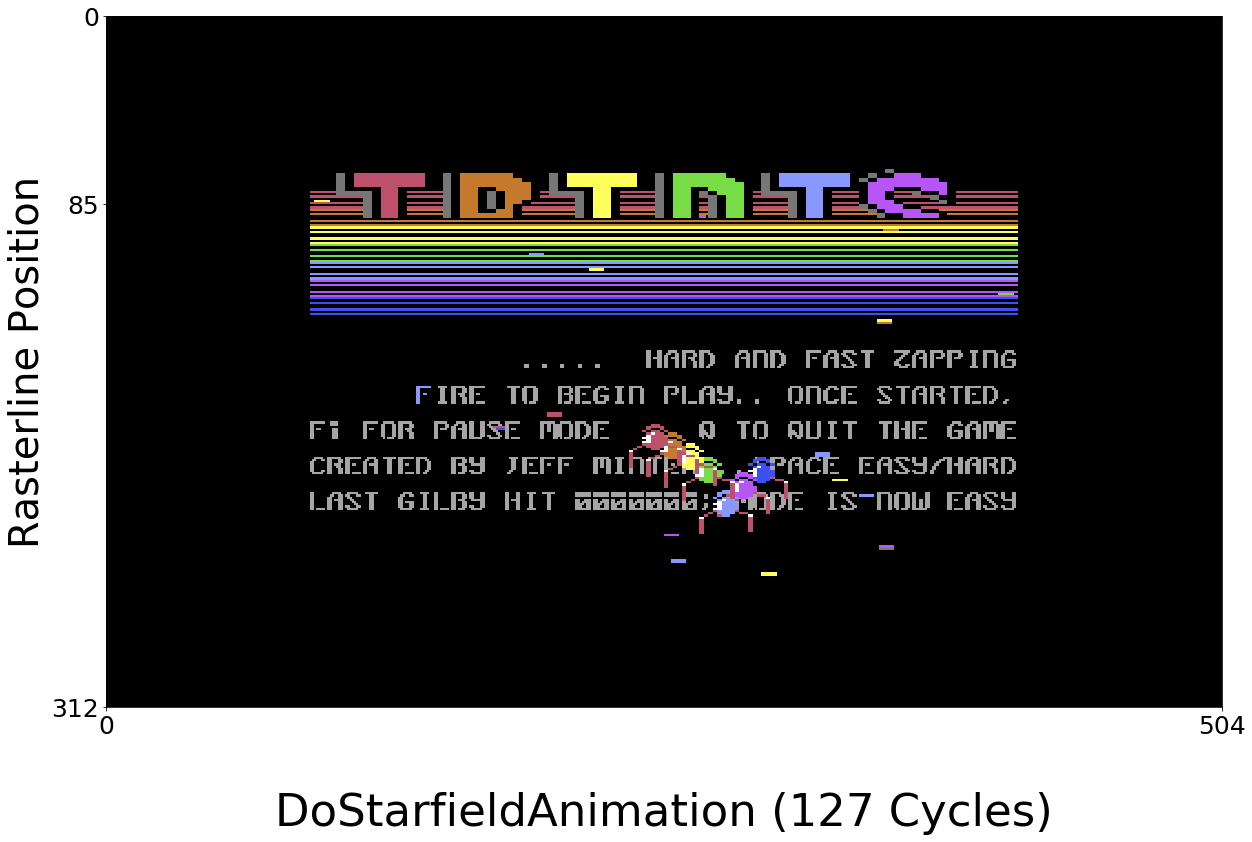

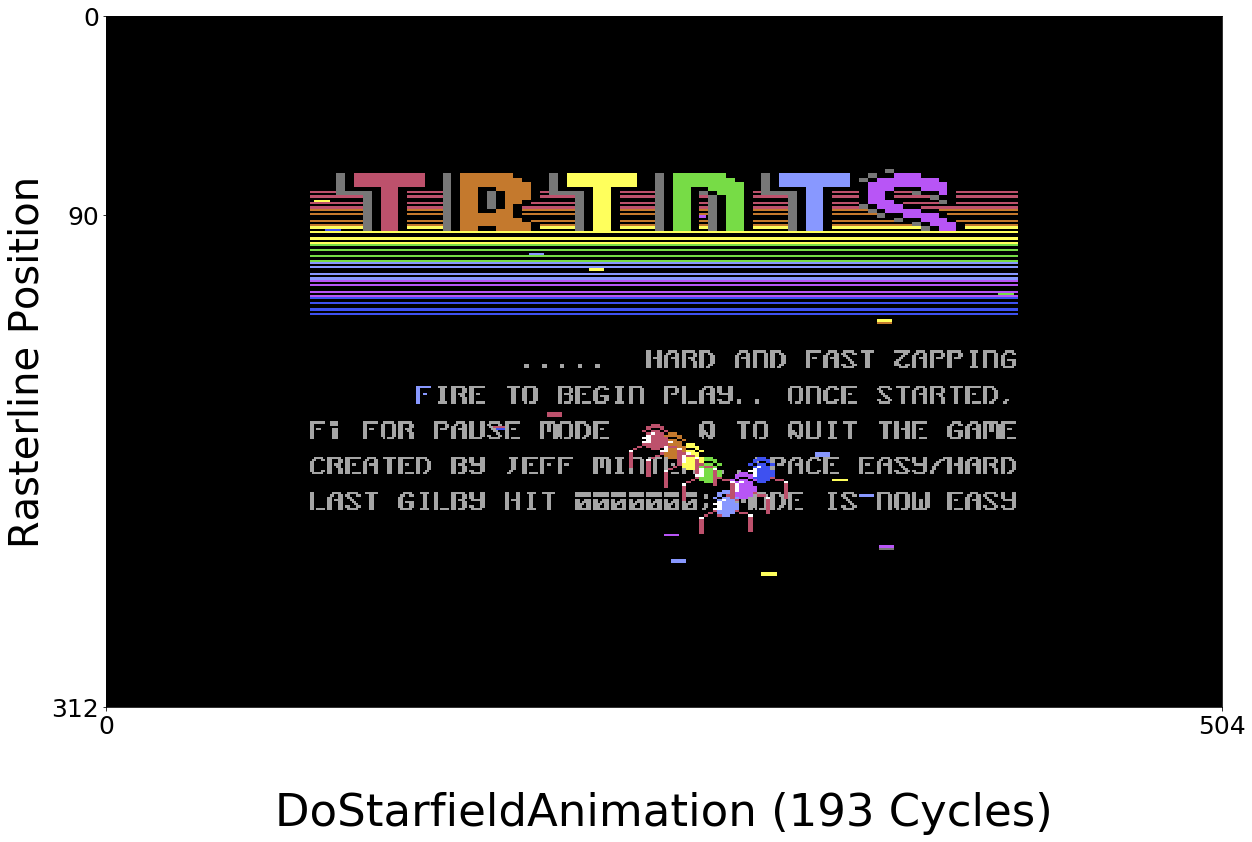

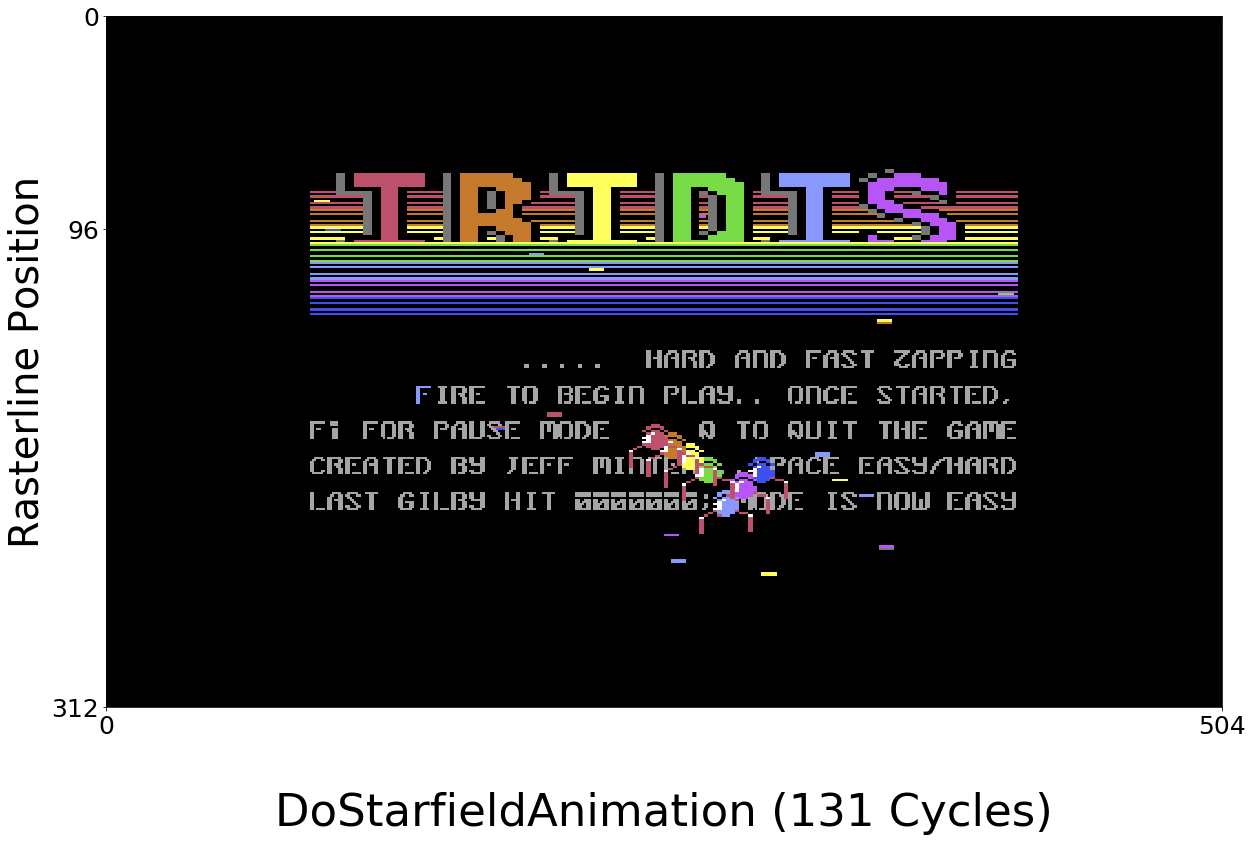

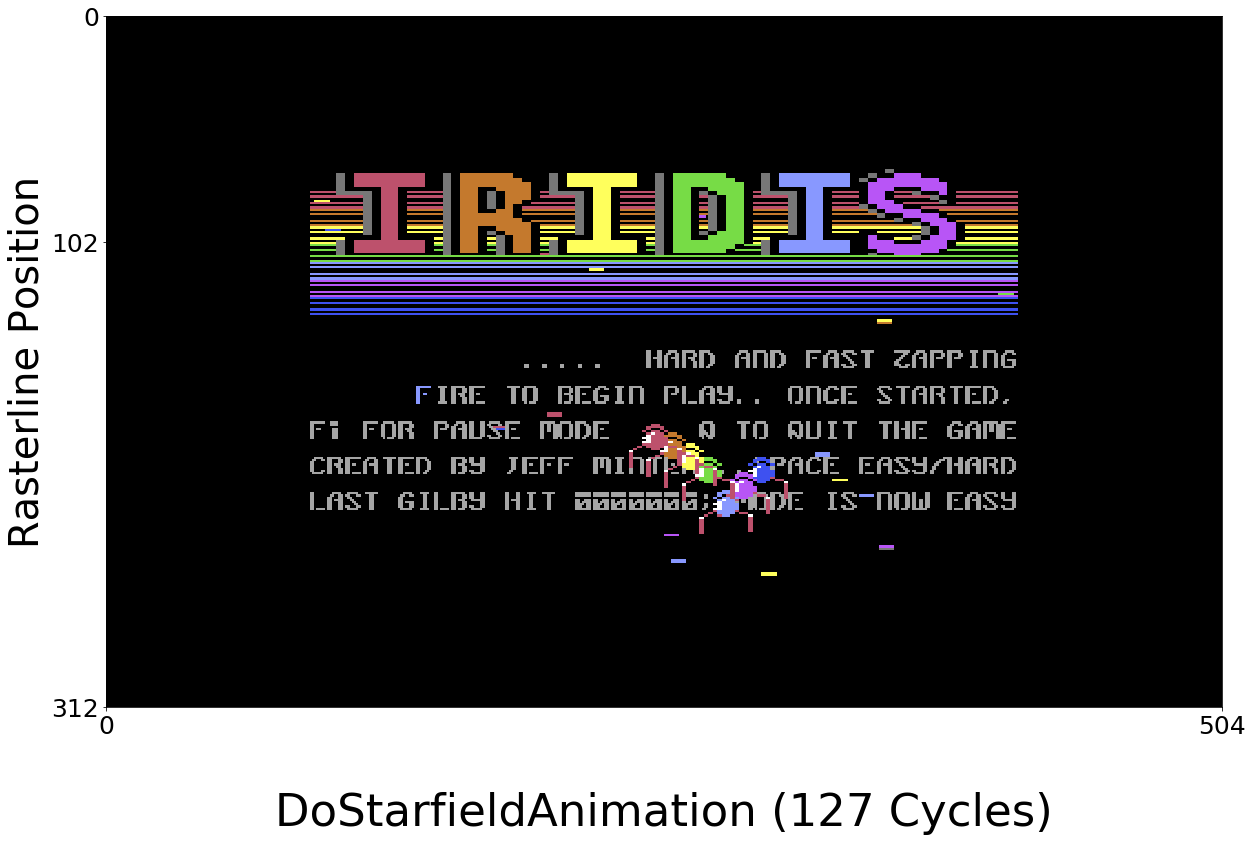

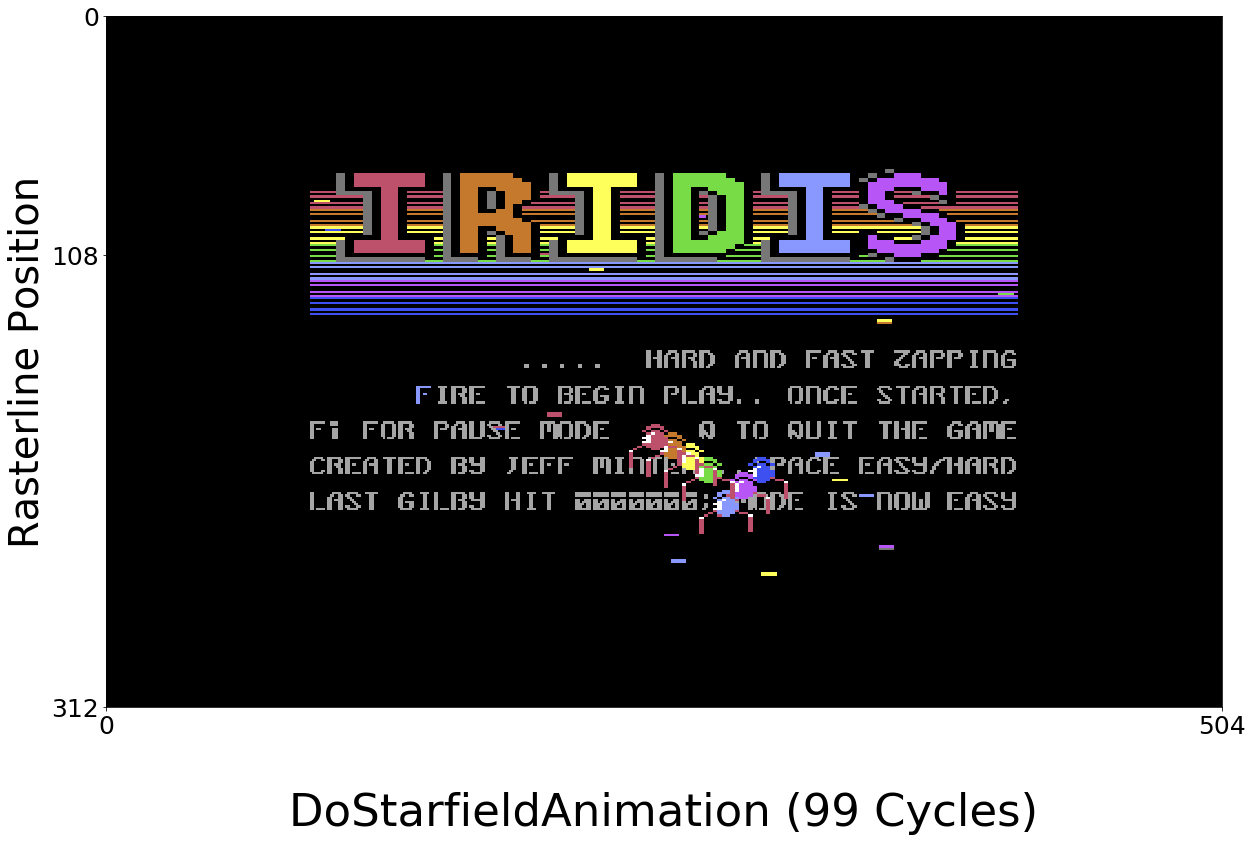

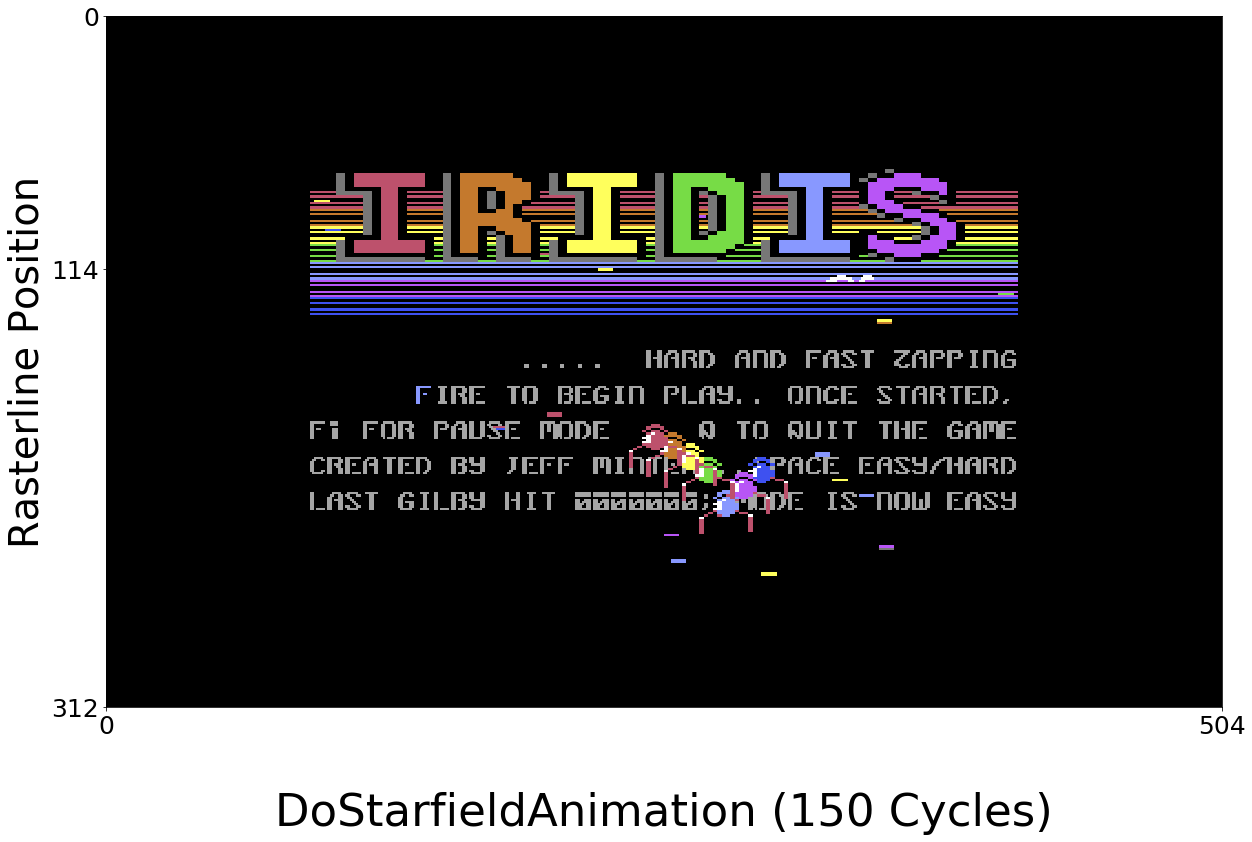

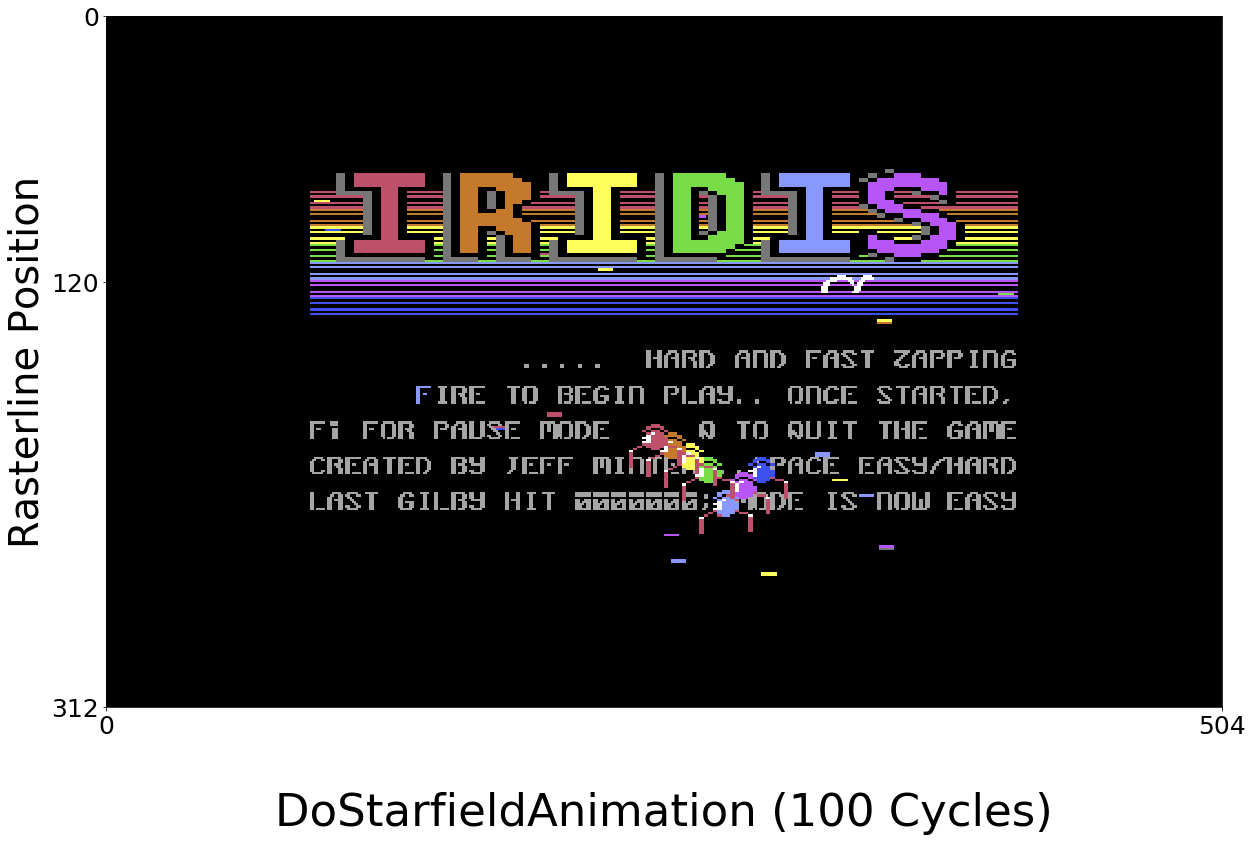

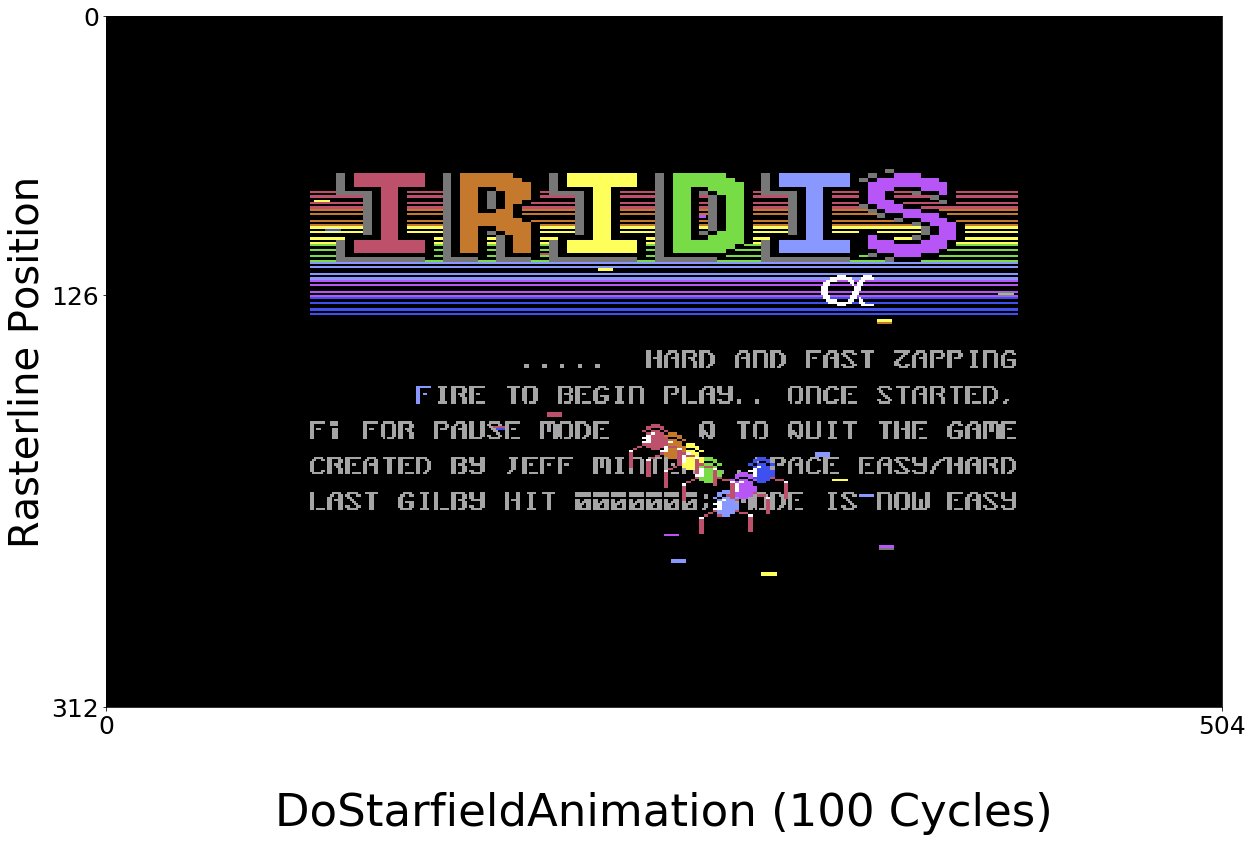

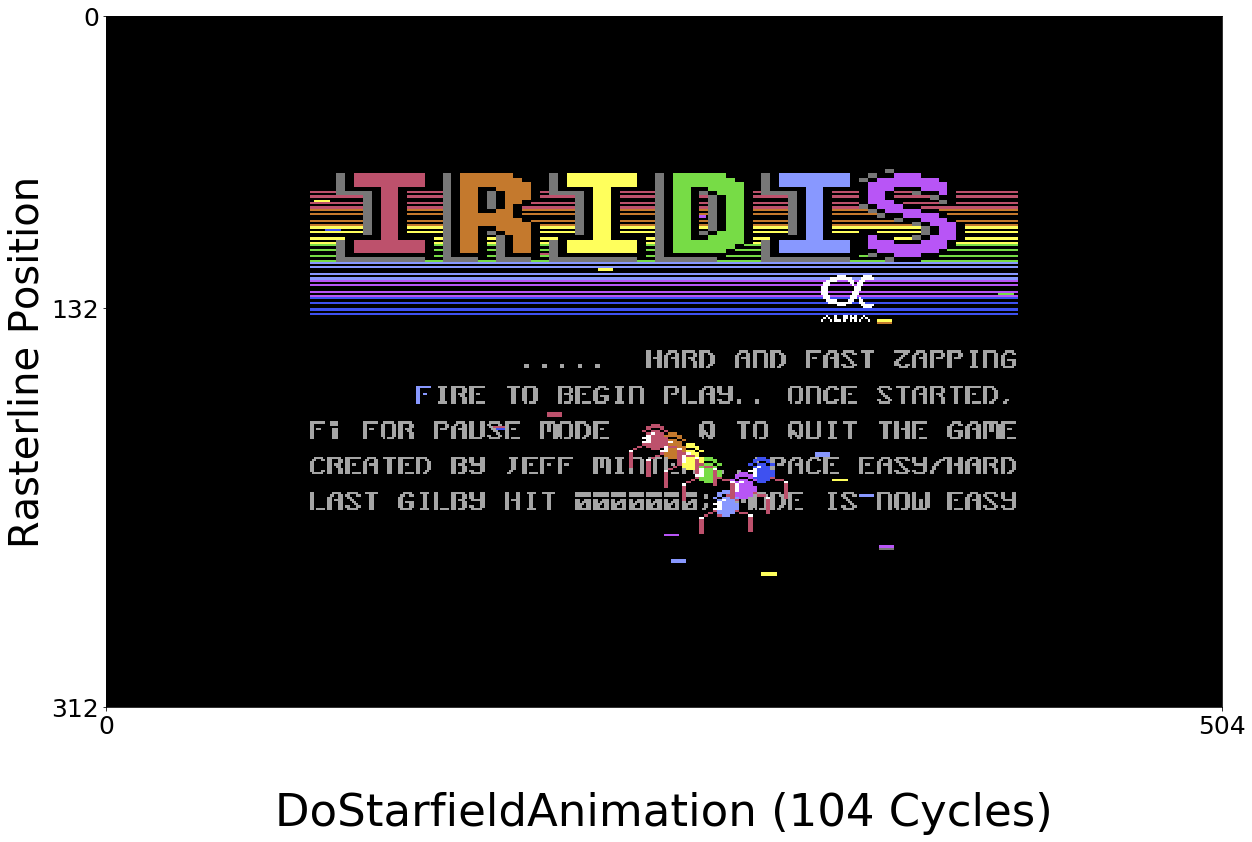

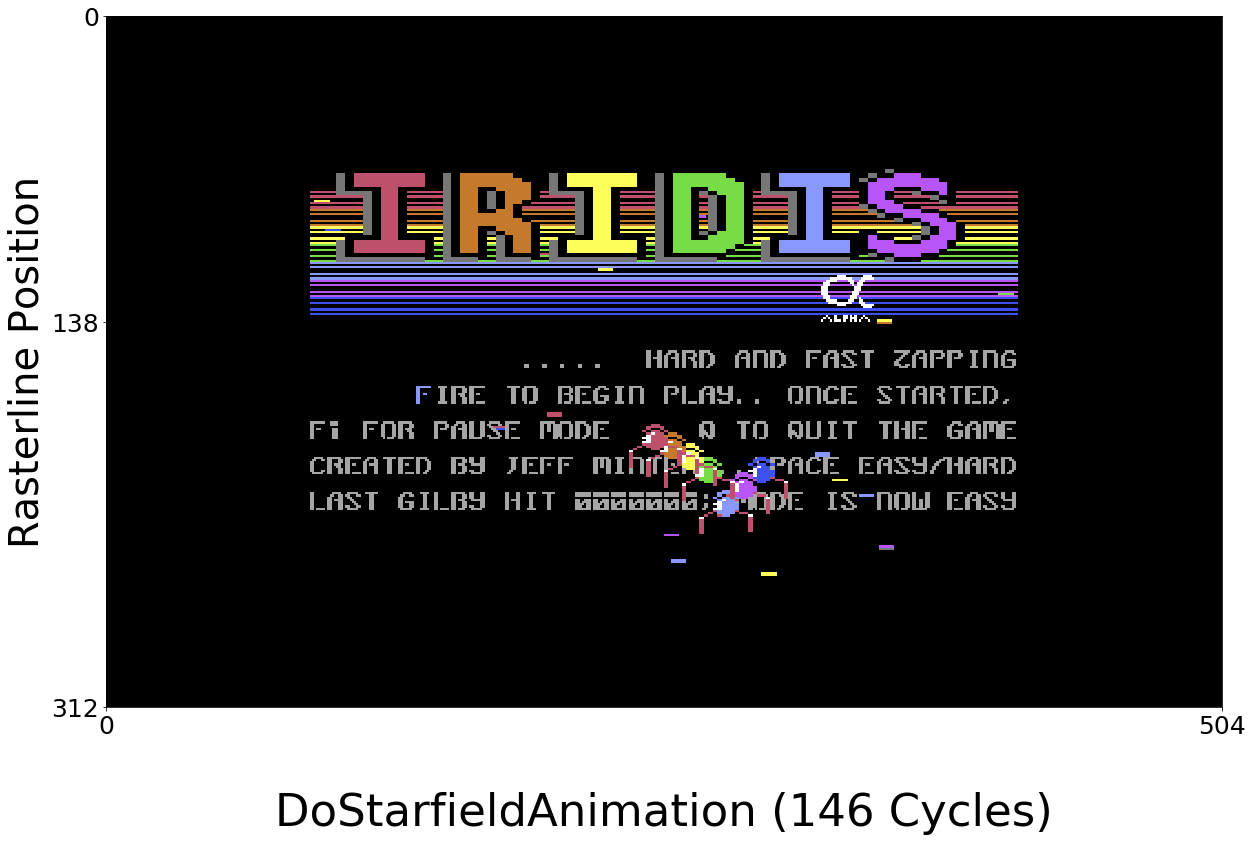

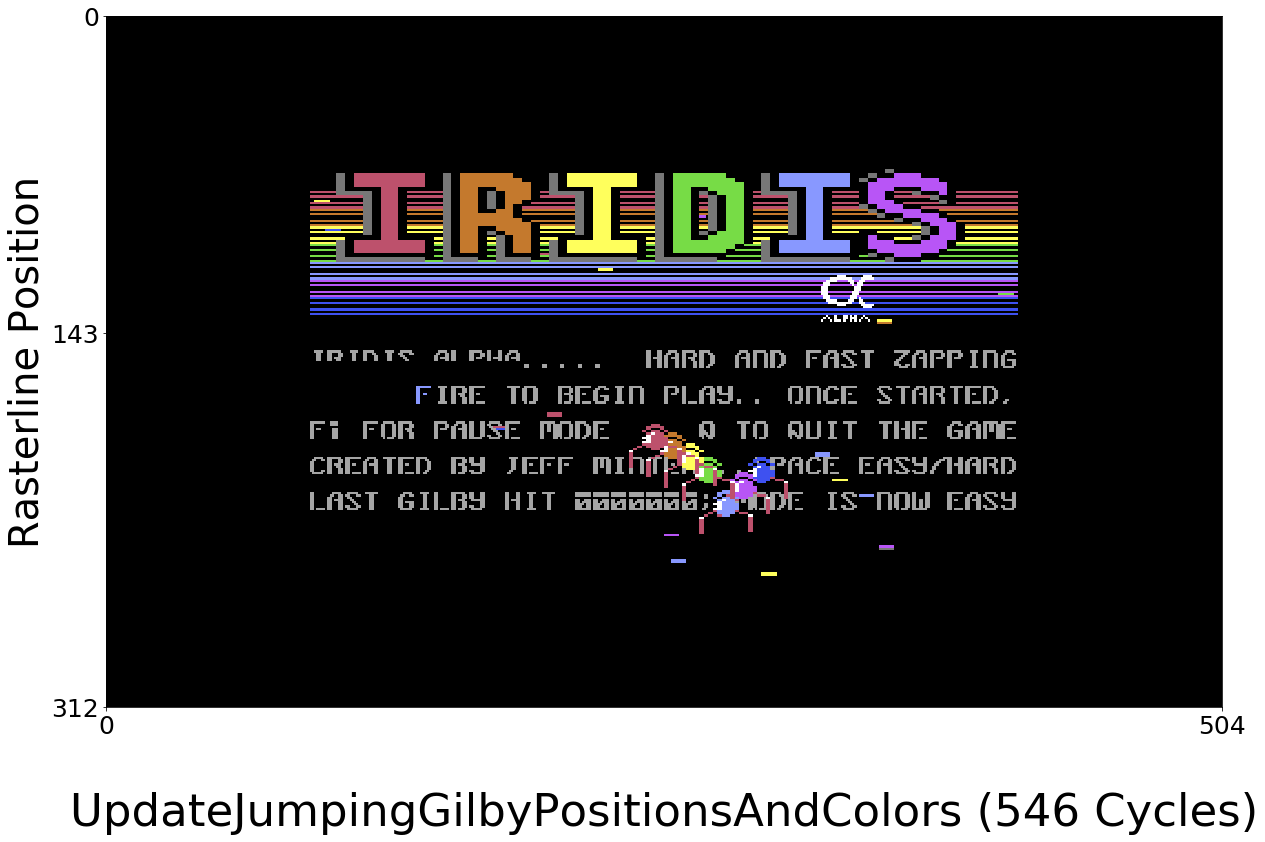

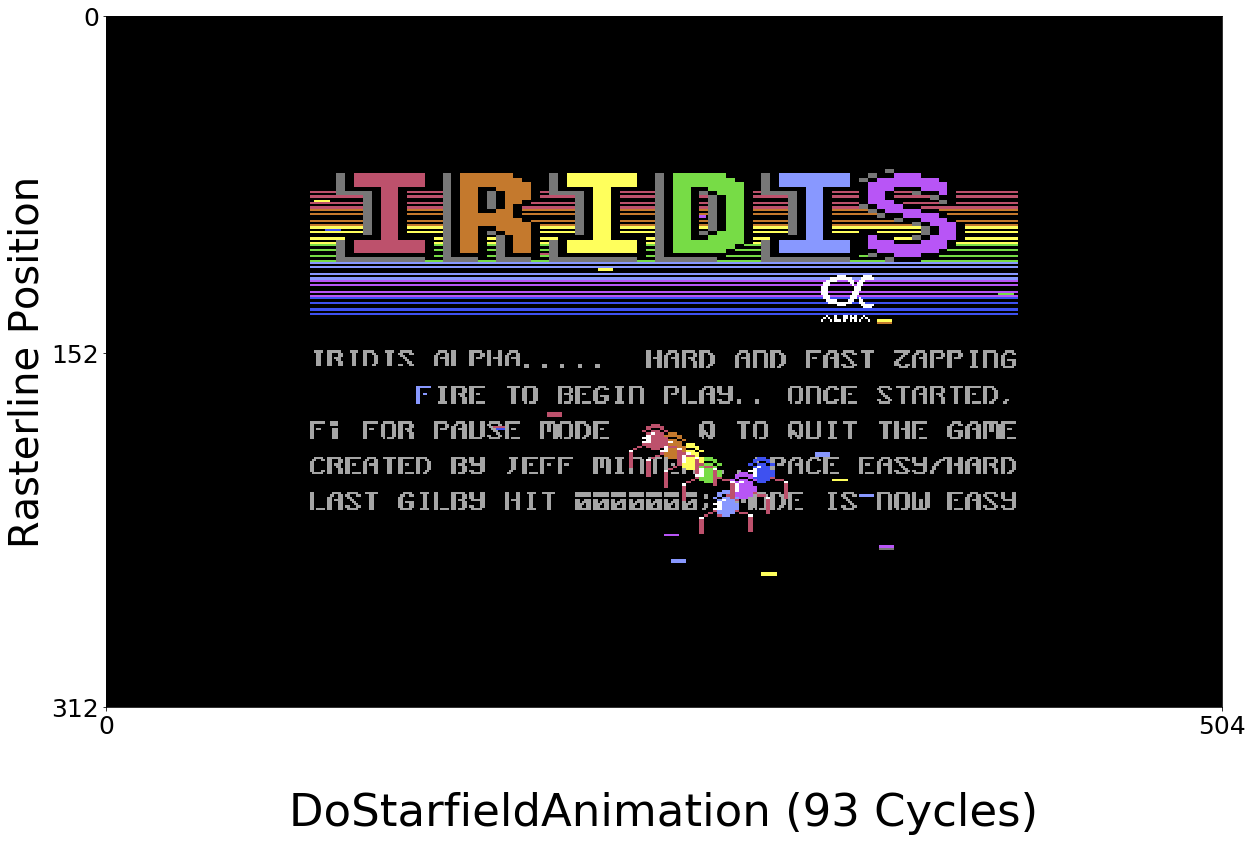

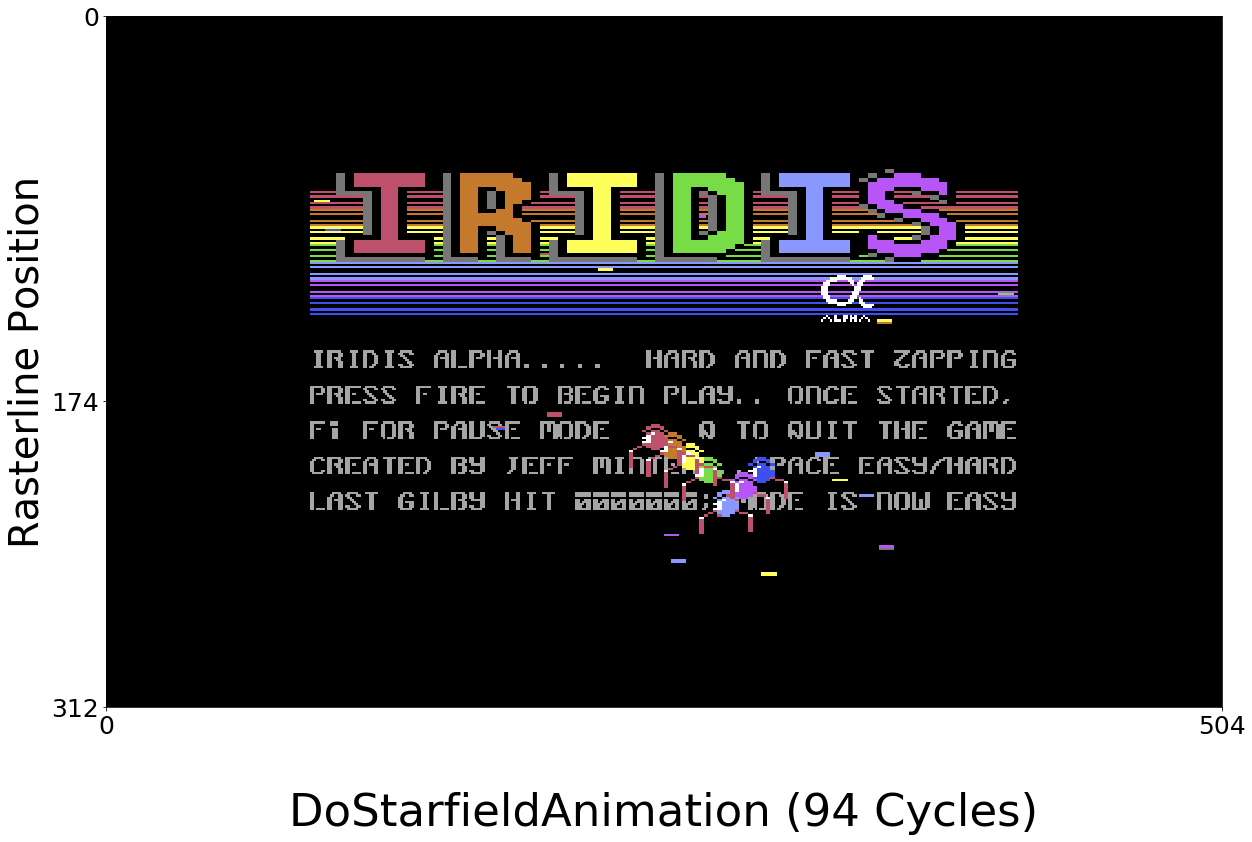

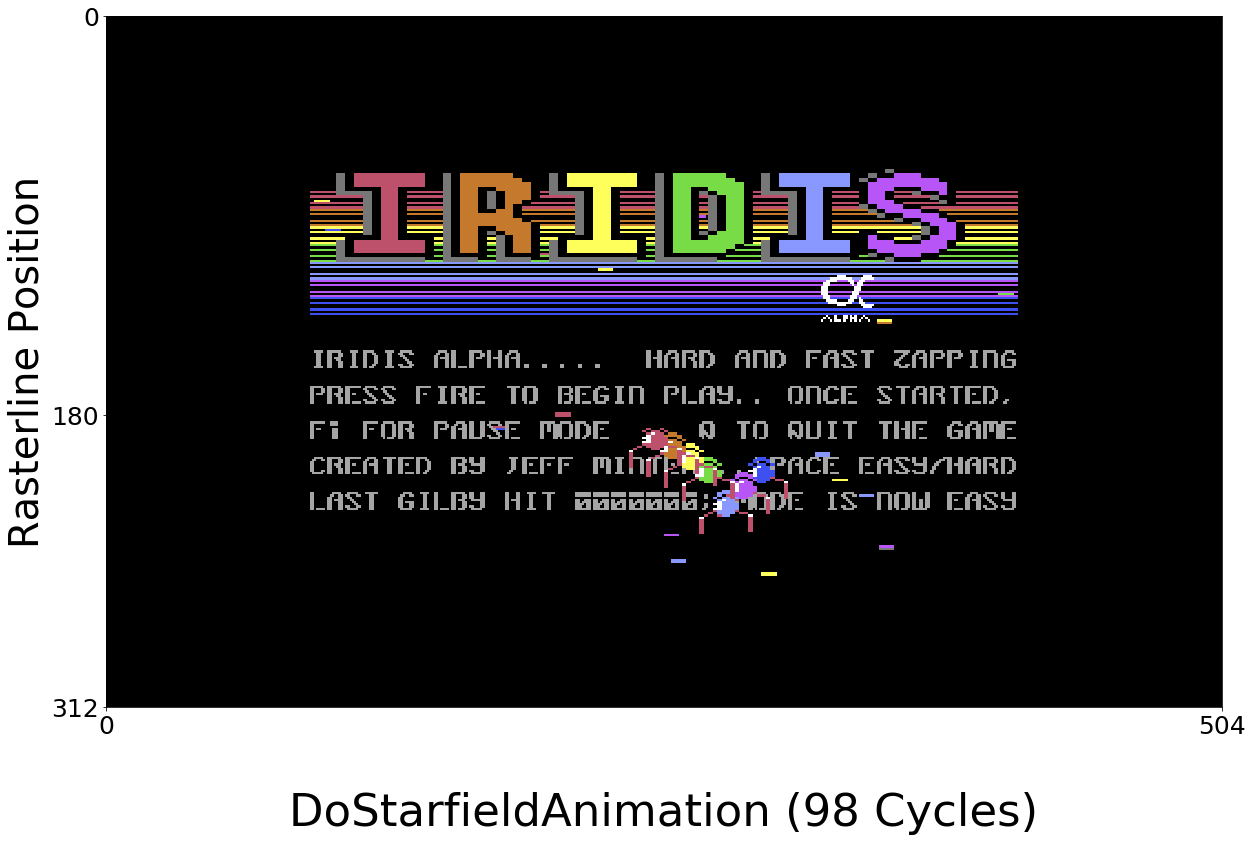

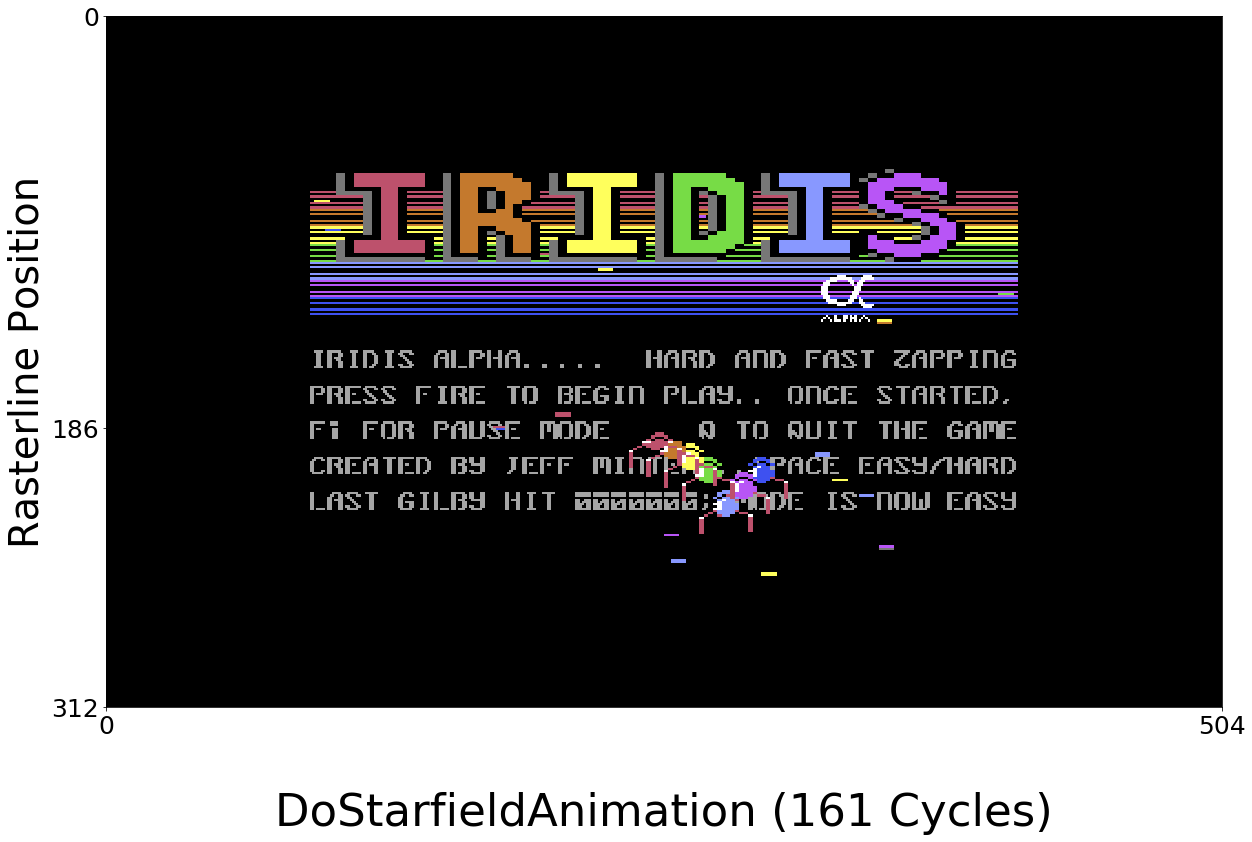

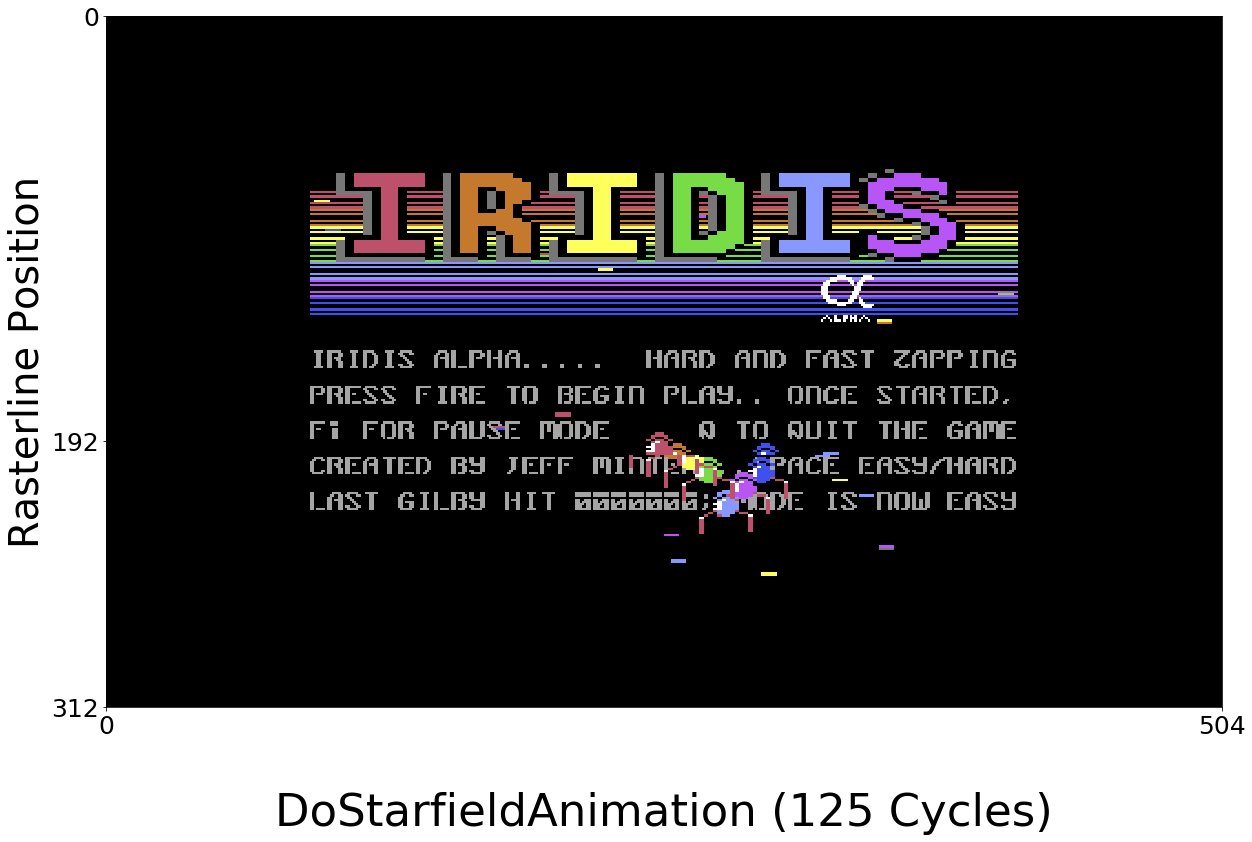

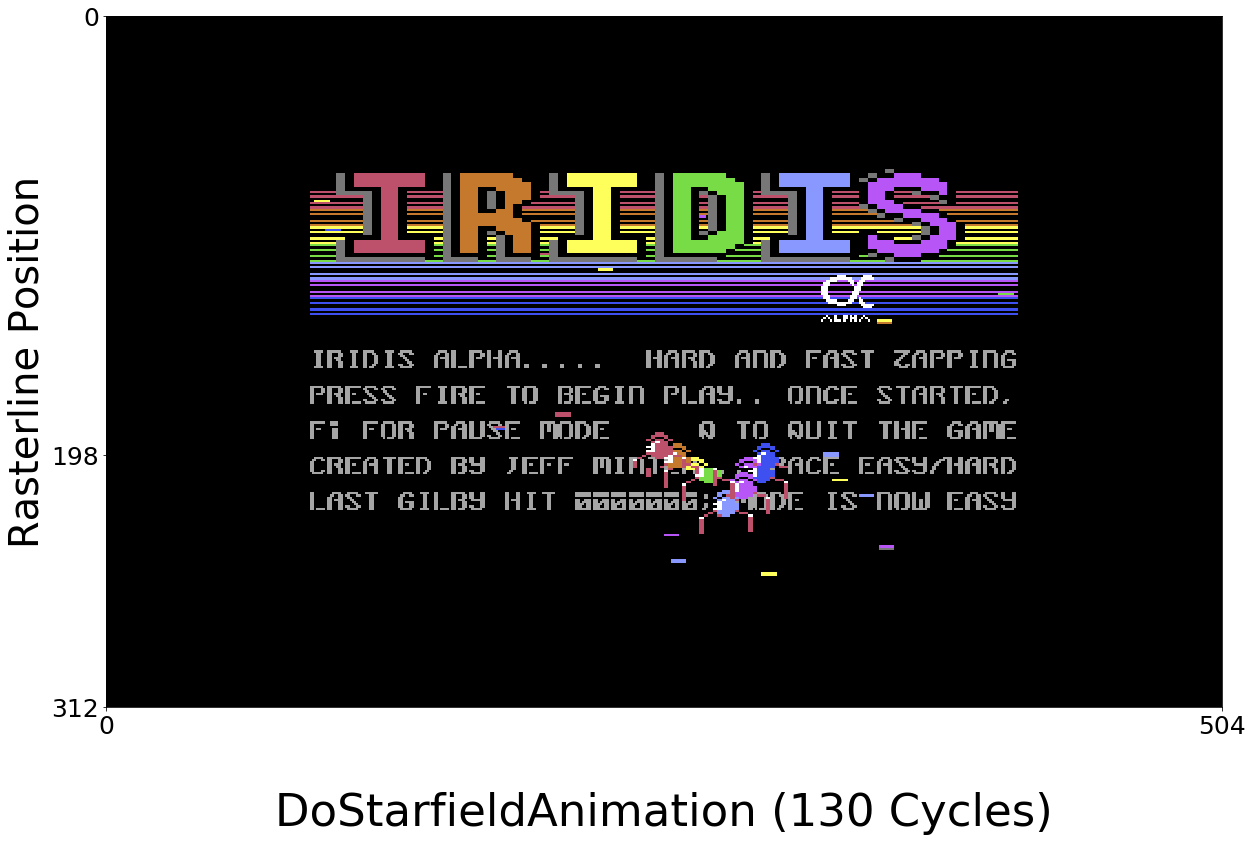

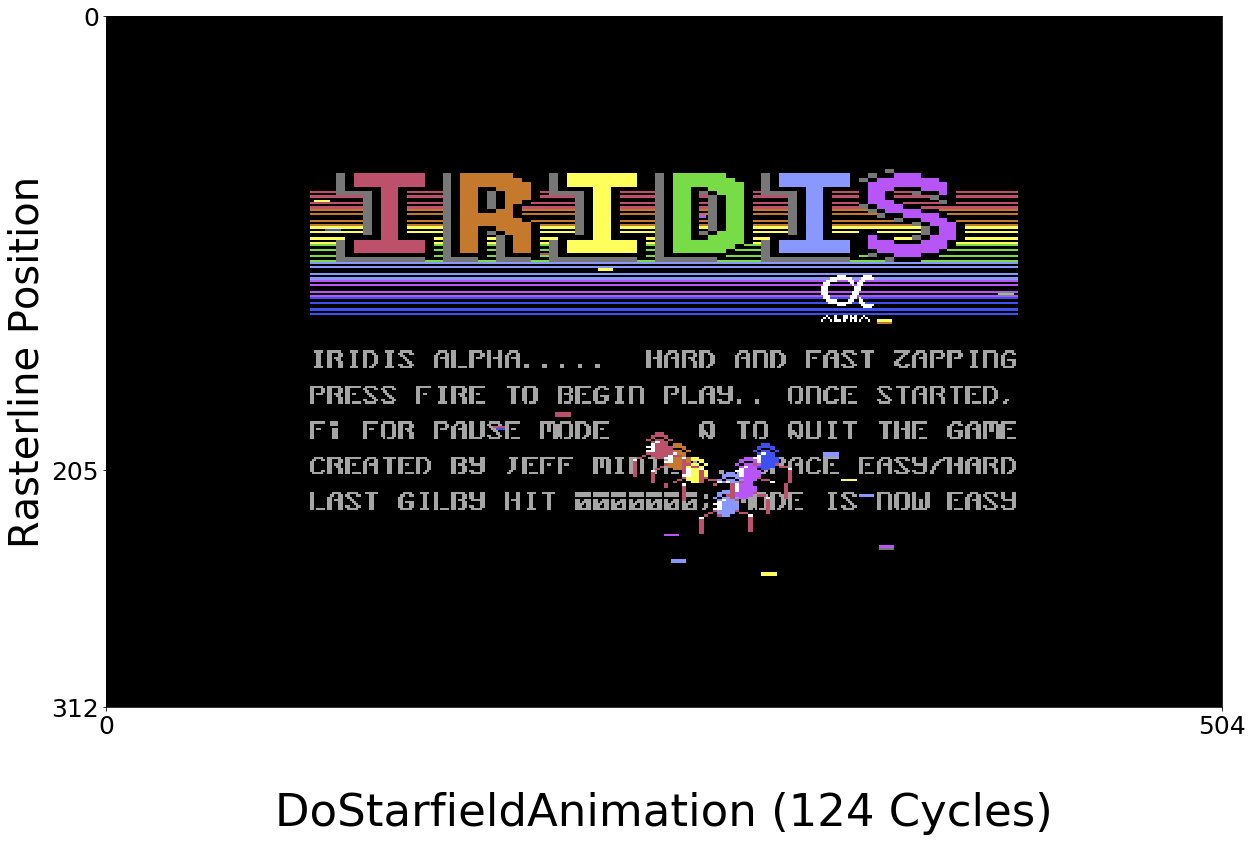

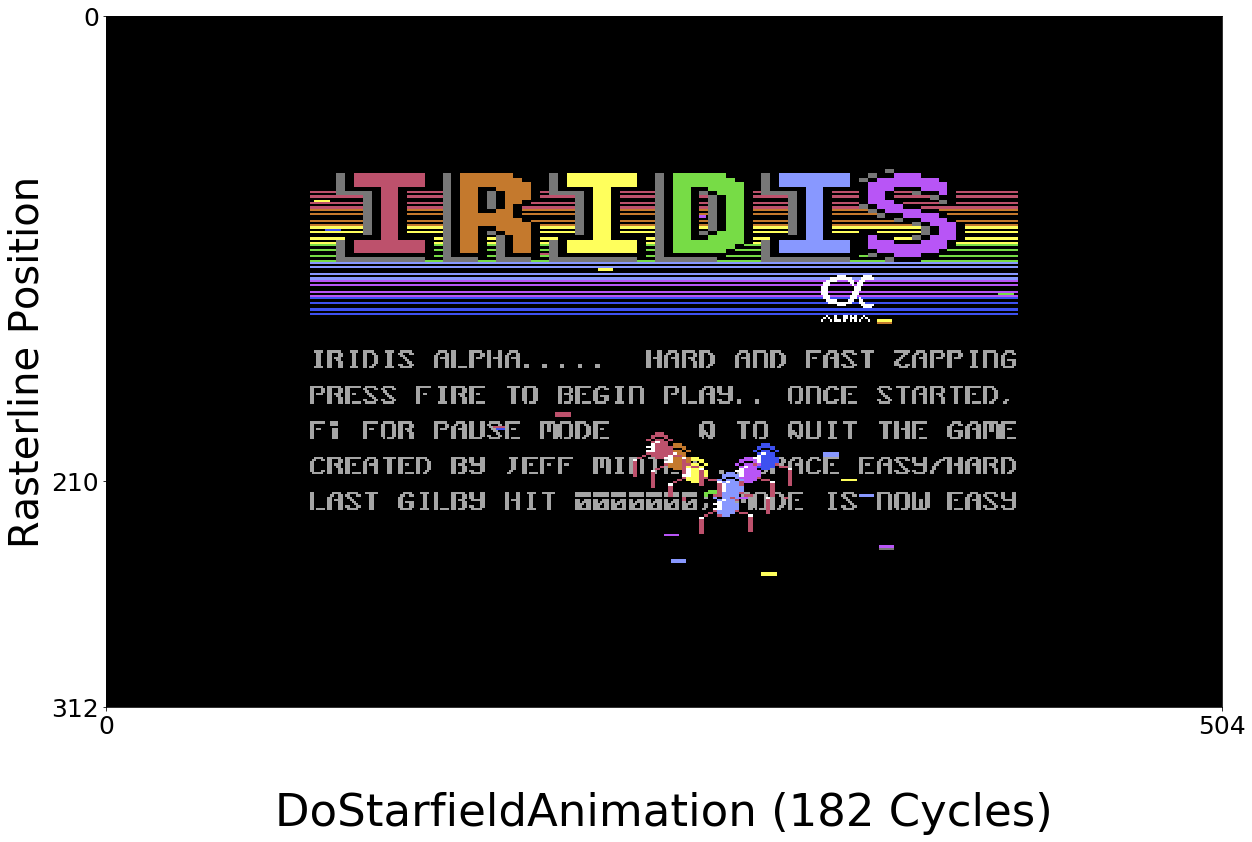

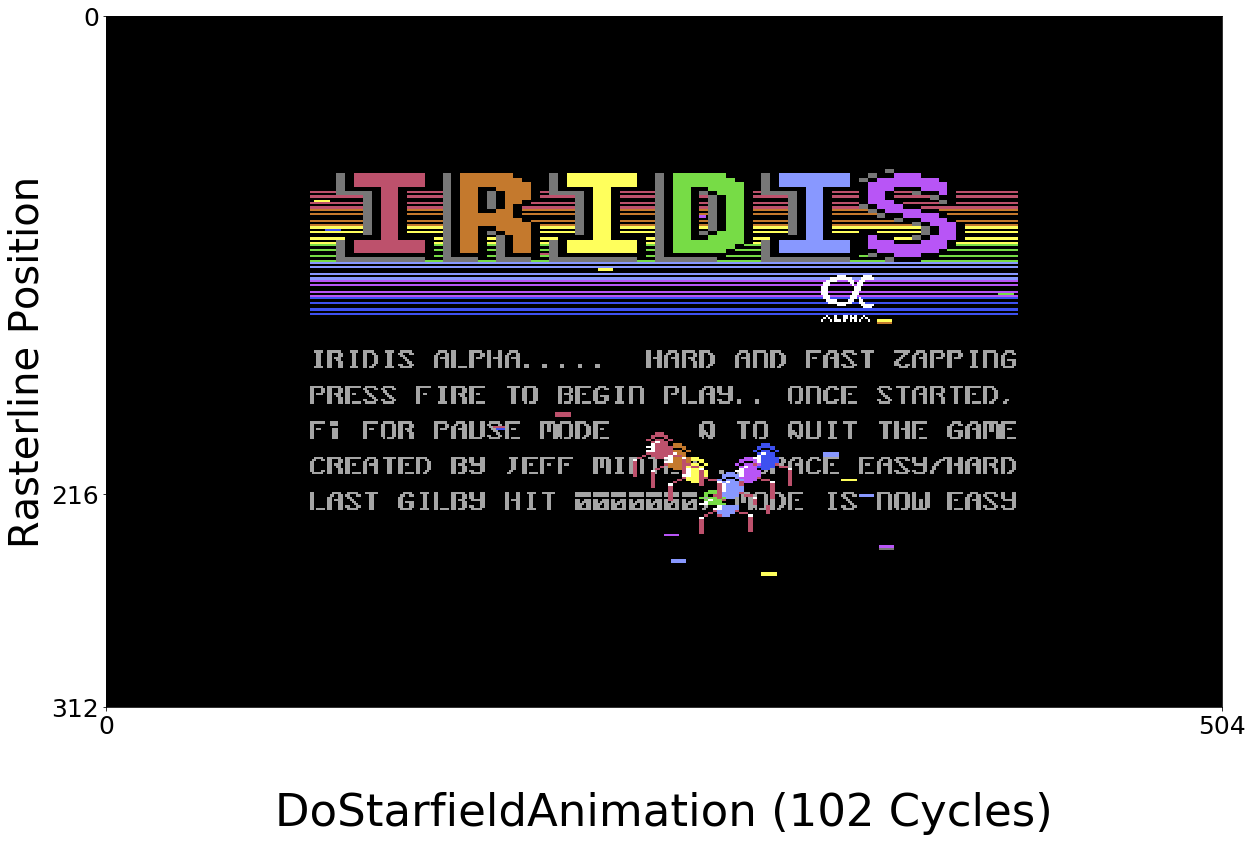

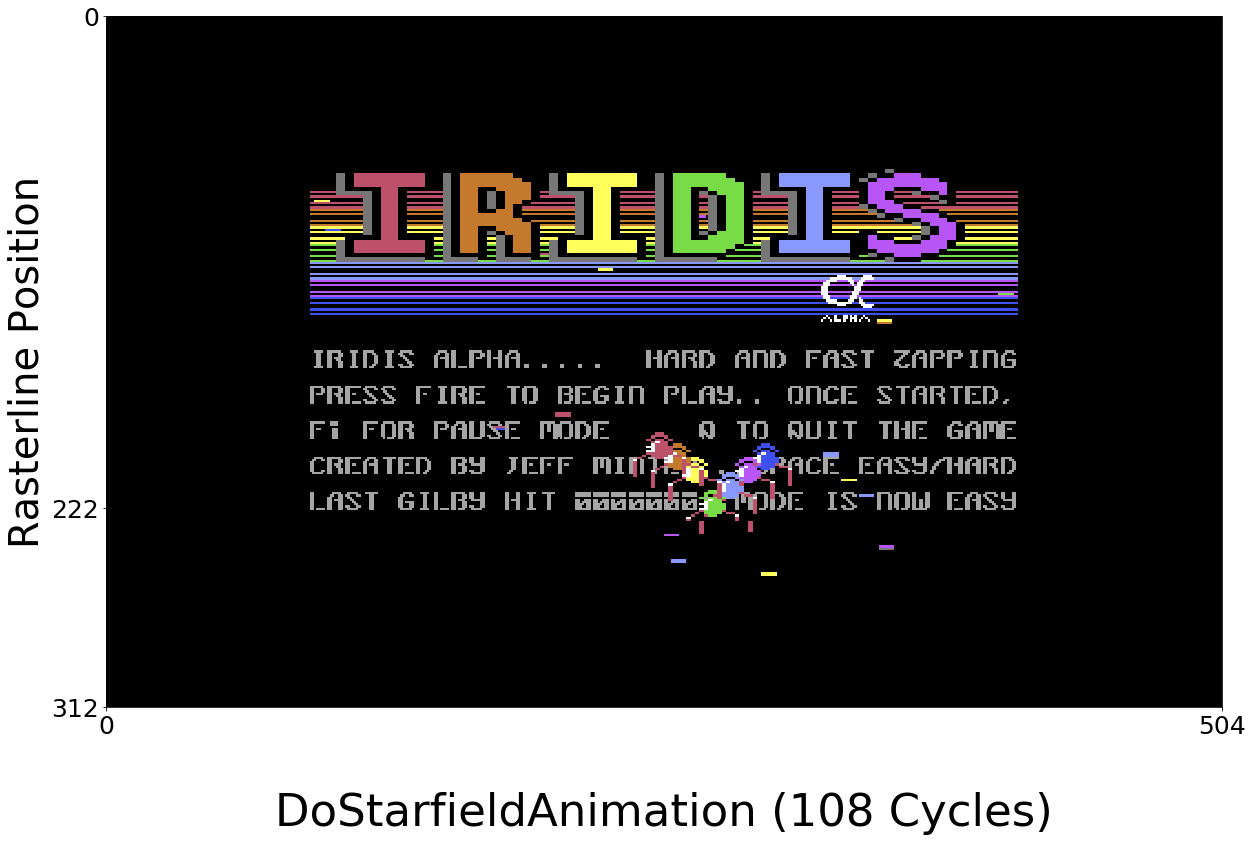

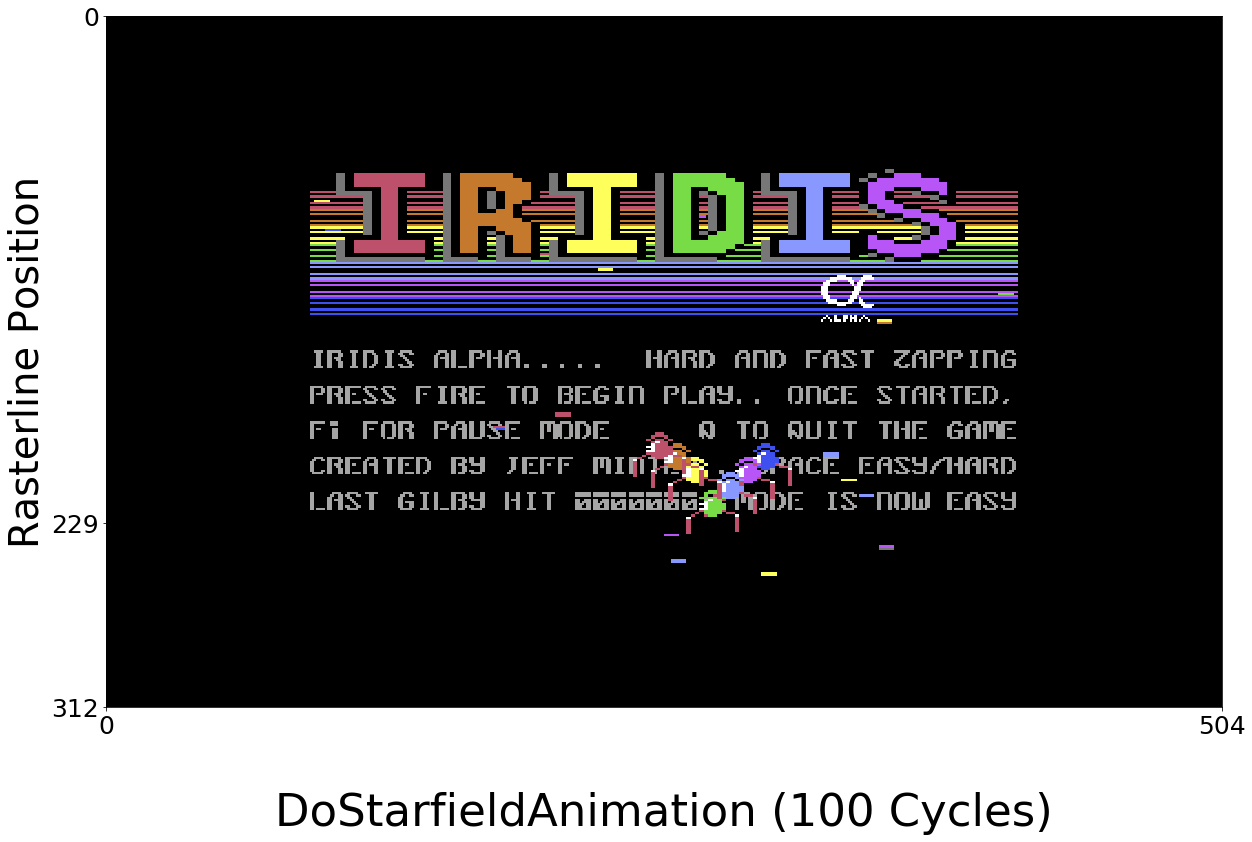

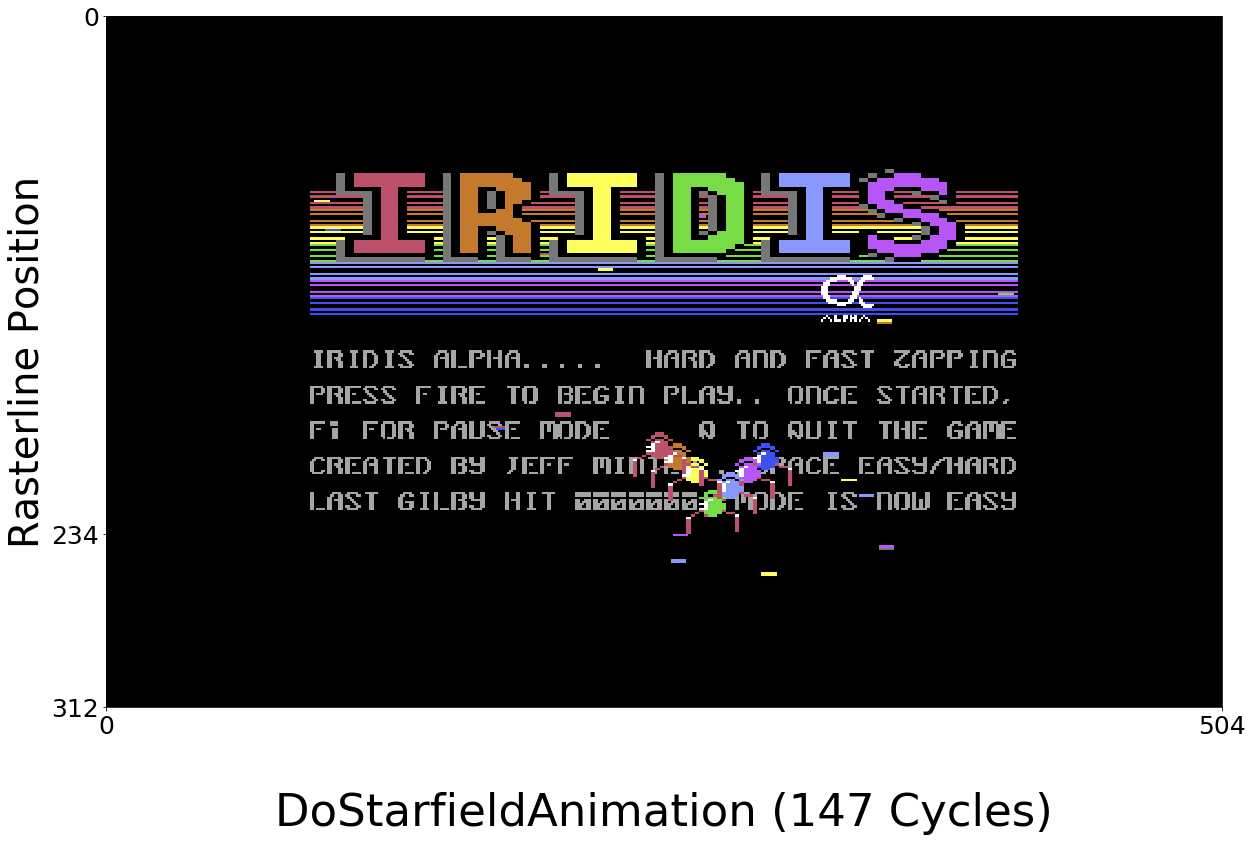

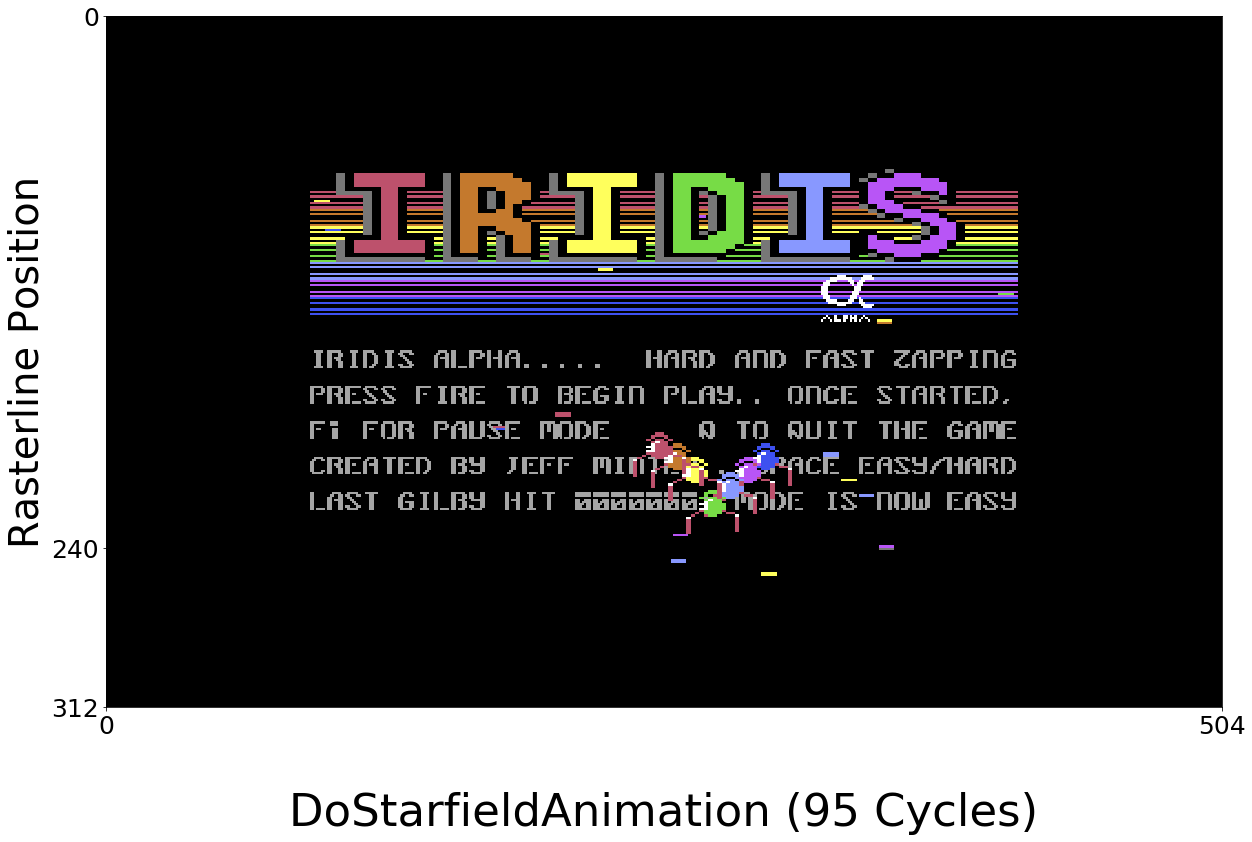

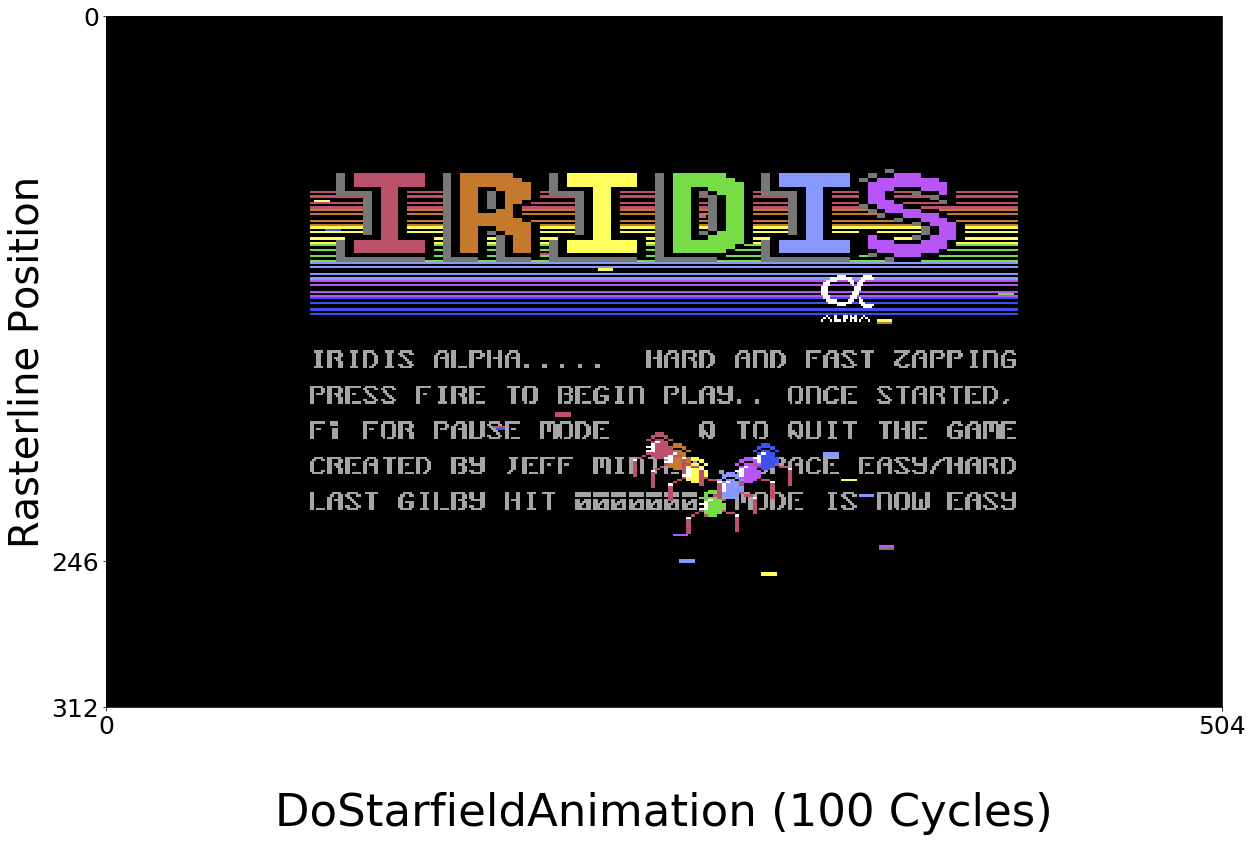

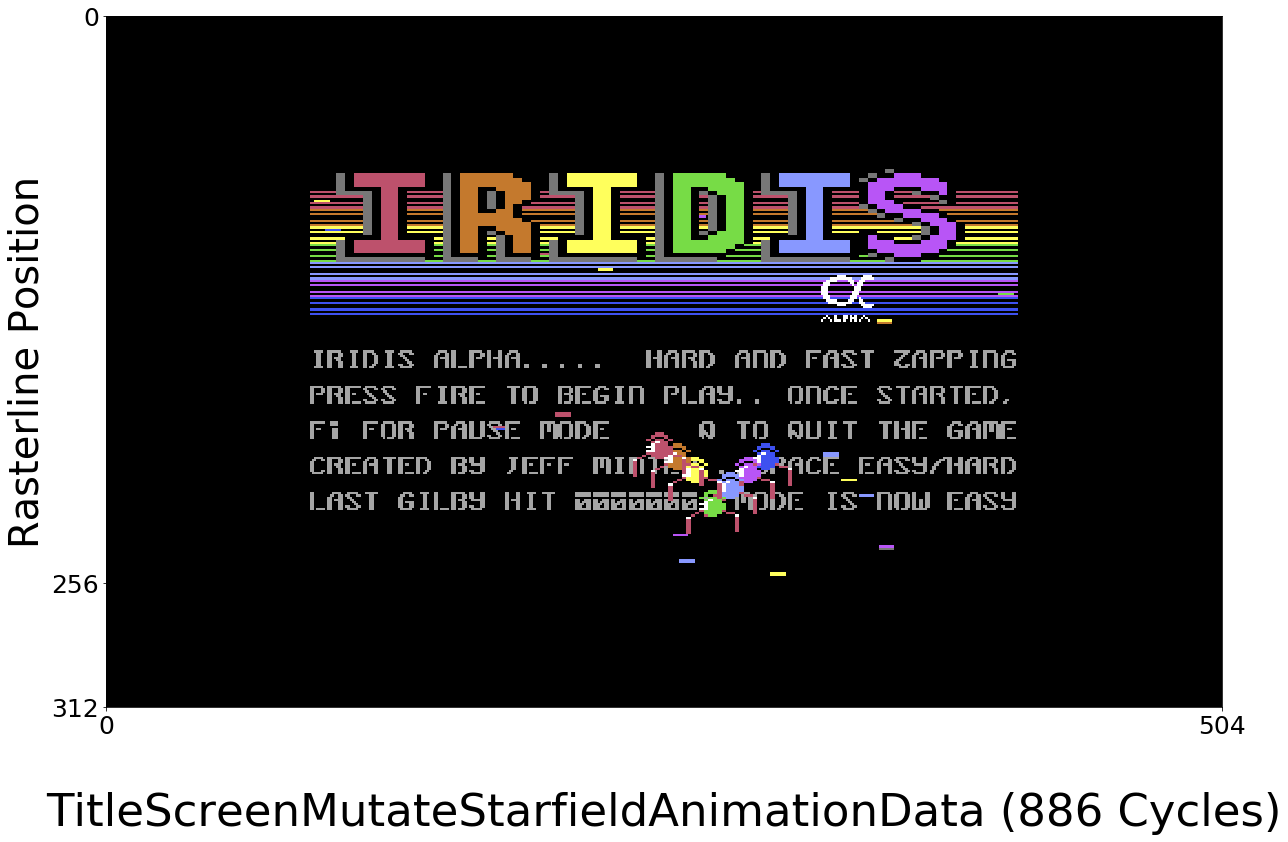

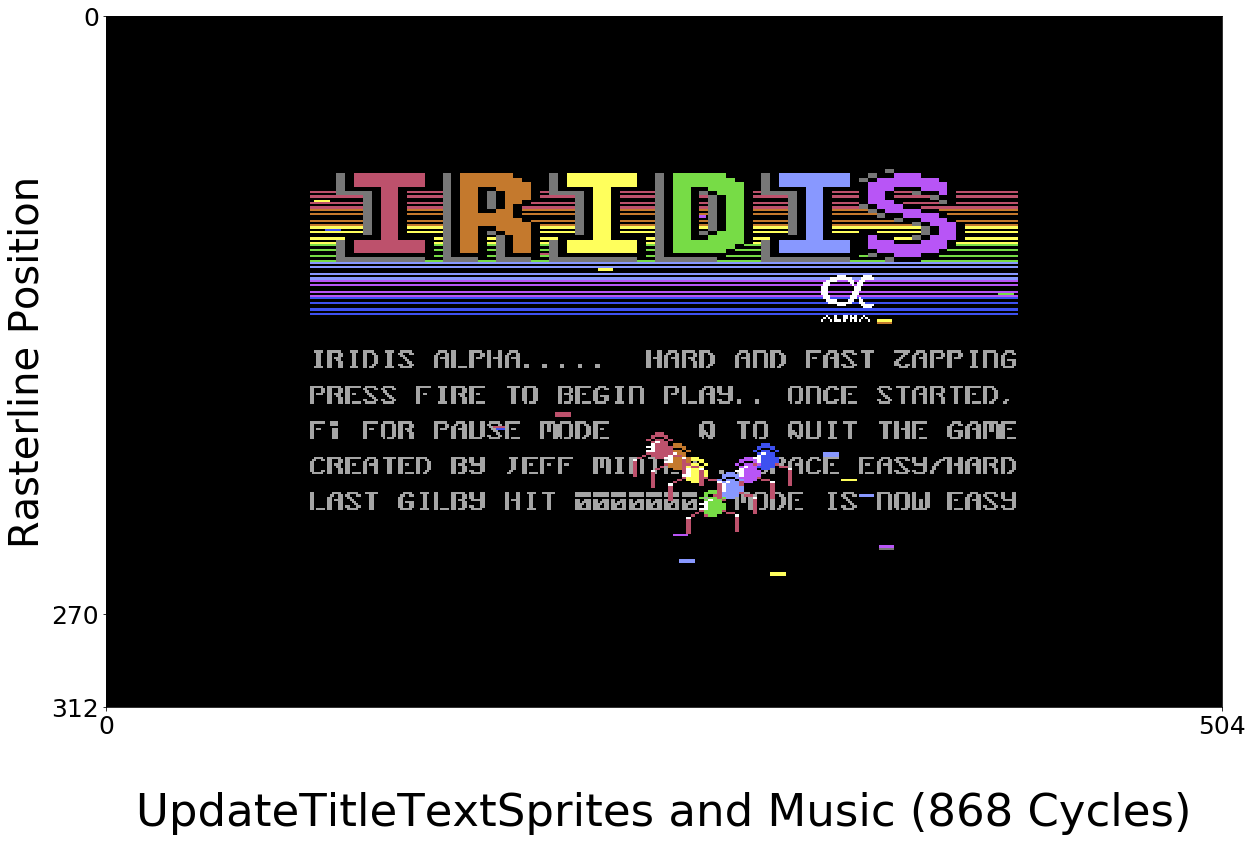

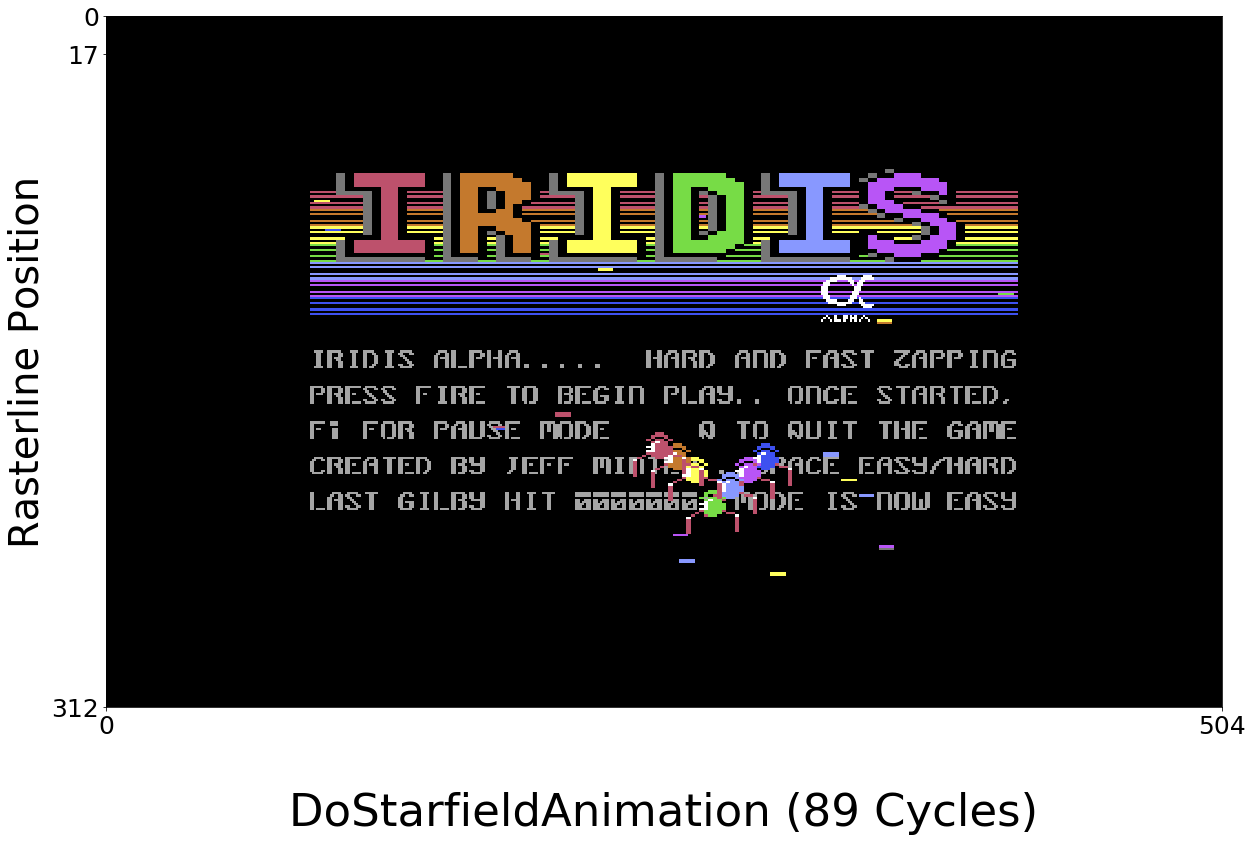

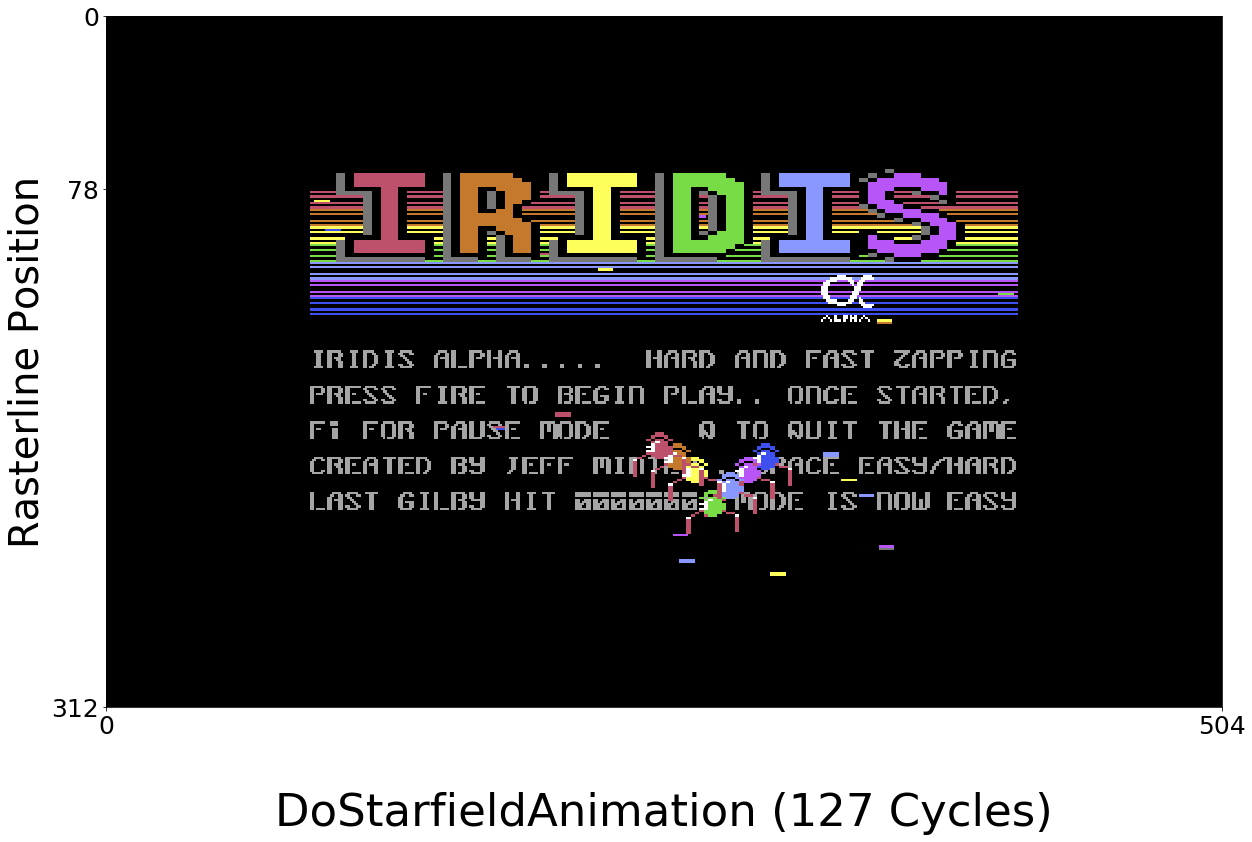

In [105]:
import imageio
from PIL import Image 

for routine, raster, cycles, file_name in routine_history[:60]:
    img = Image.open(file_name)
    background = Image.new('RGB', (504,312), "black")
    background.paste(img, (60,20))

    ylabel = f"{routine} ({cycles} Cycles)"
    plt = createGraph(background, ylabel, raster, label_size=25)
    plt.savefig(f"../src/{file_name}", bbox_inches="tight")
